# Models with Synthetic Data

Trains models on synthetic data .

In [4]:
import sys
sys.path.append('../..')


In [5]:
import tensorflow as tf
from numpy import arange
import tensorflow_datasets as tfds
import pandas as pd


In [6]:
from model_compra_comigo.experimenter import Experimenter
from model_compra_comigo.data_handler.data_simulator import DataSimulator
from model_compra_comigo.data_handler import DataHandler
from model_compra_comigo.data_handler.utils import plot_series


In [7]:
data_simulator = DataSimulator()
data_handler = DataHandler()


## Generate a Dataset

{"levelname": "WARNING", "asctime": "2023-07-05 00:58:36,323", "filename": "legend.py", "funcName": "_parse_legend_args", "lineno": 1323, "message": "No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument."}


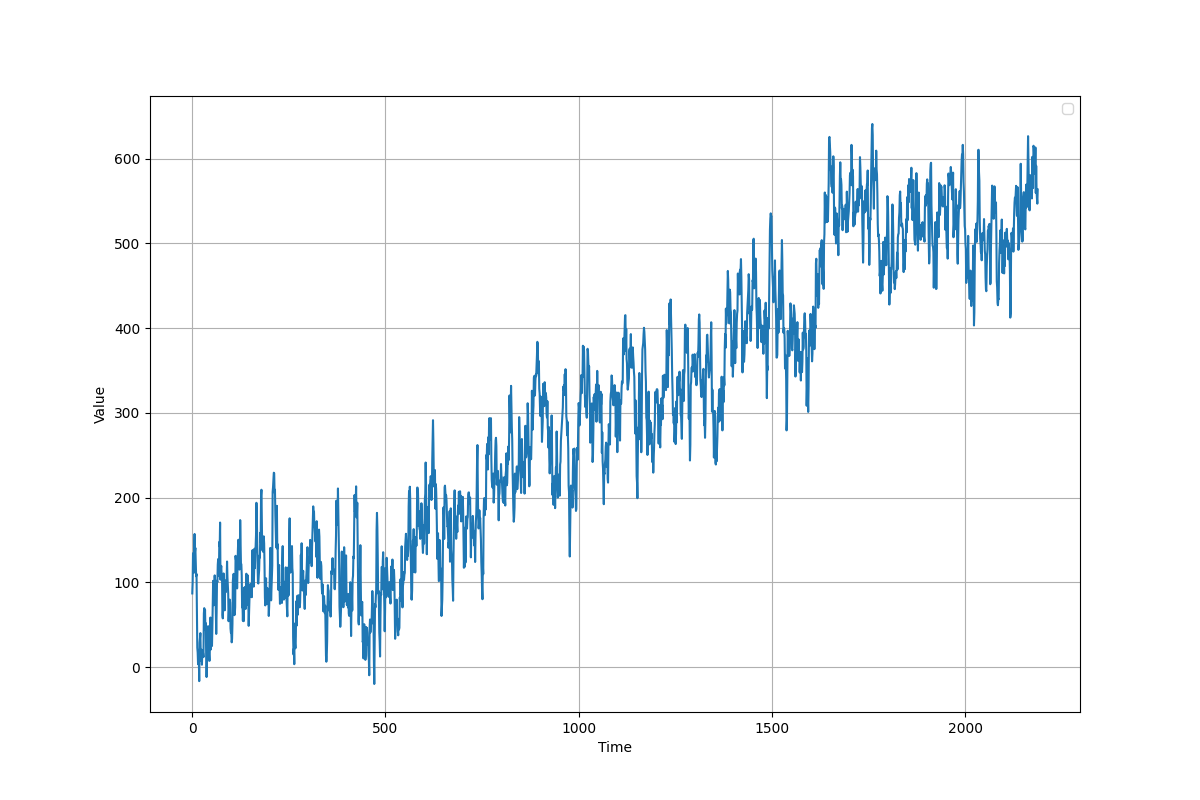

In [20]:
data_simulator = DataSimulator()
time_range = 365*6
split = 365
time_data = arange(time_range)

series, parameters = data_simulator.generate(
    time_range = time_range,
)

labels=[(f"trend_slope = {parameters['trend_slope']}\n"
         f"seasonality_period = {parameters['seasonality_period']}\n"
         f"seasonality_amplitude = {parameters['seasonality_amplitude']}\n"
         f"seasonality_phase = {parameters['seasonality_phase']}\n"
         f"seasonality_time_threshold = {parameters['seasonality_time_threshold']}\n"
         f"seasonality_ncos = {parameters['seasonality_ncos']}\n"
         f"seasonality_nexp = {parameters['seasonality_nexp']}\n"
         f"noise_scaling_factor = {parameters['noise_scaling_factor']}\n"
         f"autocorrelation_amplitude = {parameters['autocorrelation_amplitude']}\n"
         f"autocorrelation_phi = {parameters['autocorrelation_phi']}"
        )]

data_handler.plot_series(
    time=time_data,
    series=series,
    labels=labels
)


# Trains and tests some models
Experimentation

In [29]:
from autots import AutoTS


## Autots


In [28]:
series_df = pd.DataFrame(zip(list(time_data), list(series)), columns=["Date", "Values"])
series_df.head()

,Date,Values
0,0,87.104444
1,1,100.550019
2,2,134.633486
3,3,124.239896
4,4,111.377060


In [30]:
model = AutoTS(forecast_length=90, frequency='infer', 
               ensemble='simple', drop_data_older_than_periods=1000, max_generations=10,)
model = model.fit(series_df[:-90], date_col='Date', value_col='Values', id_col=None)

Inferred frequency is: N
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model ARIMA in generation 0 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.92624D+03    |proj g|=  4.66540D+03

At iterate    1    f=  5.98059D+00    |proj g|=  2.55362D+00


 This problem is unconstrained.



At iterate    2    f=  5.40084D+00    |proj g|=  1.60595D+00

At iterate    3    f=  5.15705D+00    |proj g|=  1.24889D+00

At iterate    4    f=  5.00220D+00    |proj g|=  4.37586D-01

At iterate    5    f=  4.95559D+00    |proj g|=  3.39222D-01

At iterate    6    f=  4.85073D+00    |proj g|=  1.84314D-01

At iterate    7    f=  4.80380D+00    |proj g|=  2.19985D-01

At iterate    8    f=  4.72972D+00    |proj g|=  3.92983D-01

At iterate    9    f=  4.66561D+00    |proj g|=  2.79487D-01

At iterate   10    f=  4.59148D+00    |proj g|=  1.54730D-01

At iterate   11    f=  4.56482D+00    |proj g|=  1.09651D-01

At iterate   12    f=  4.55046D+00    |proj g|=  2.13414D-01

At iterate   13    f=  4.54155D+00    |proj g|=  5.53980D-02

At iterate   14    f=  4.53923D+00    |proj g|=  4.77753D-02

At iterate   15    f=  4.53529D+00    |proj g|=  3.15916D-02

At iterate   16    f=  4.53230D+00    |proj g|=  1.35724D-02

At iterate   17    f=  4.53082D+00    |proj g|=  2.77341D-02

At iter


At iterate  135    f=  4.52559D+00    |proj g|=  1.80595D-03

At iterate  136    f=  4.52559D+00    |proj g|=  1.80608D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17    136    178      1     0     0   1.806D-03   4.526D+00
  F =   4.5255875239119385     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model AverageValueNaive in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 8 with model DatepartRegression in generation 0 of 10


2023-07-05 01:00:29.452563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-05 01:00:29.453423: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-05 01:00:29.454013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2023-07-05 01:00:29.842890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-05 01:00:29.843848: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-05 01:00:29.844484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 [==============================] - 3s 2ms/step - loss: 0.4173
Epoch 2/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4179
Epoch 3/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4175
Epoch 4/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4168
Epoch 5/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4167
Epoch 6/50
29/29 [==============================] - 0s 3ms/step - loss: 0.4176
Epoch 7/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4181
Epoch 8/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4171
Epoch 9/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4173
Epoch 10/50
29/29 [==============================] - 0s 3ms/step - loss: 0.4178
Epoch 11/50
29/29 [==============================] - 0s 3ms/step - loss: 0.4171
Epoch 12/50
29/29 [==============================] - 0s 2ms/step - loss: 0.4170
Epoch 13/50
29/29 [==============================] - 0s 2ms/

2023-07-05 01:00:36.152563: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-05 01:00:36.153378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-05 01:00:36.153966: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 0s 1ms/step
Model Number: 9 with model ETS in generation 0 of 10
Model Number: 10 with model ETS in generation 0 of 10
Model Number: 11 with model GLM in generation 0 of 10
Model Number: 12 with model GLM in generation 0 of 10
Model Number: 13 with model GLS in generation 0 of 10
Model Number: 14 with model GLS in generation 0 of 10
Model Number: 15 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue.') in model 15 in generation 0: GluonTS
Model Number: 16 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue.') in model 16 in generation 0: GluonTS
Model Number: 17 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the iss

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 36 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 36 in generation 0: FBProphet
Model Number: 37 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue.') in model 37 in generation 0: GluonTS
Model Number: 38 with model MultivariateRegression in generation 0 of 10
Model Number: 39 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 39 in generation 0: MultivariateRegression
Model Number: 40 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 40 in generation 0: DatepartRegression
Model Number: 41 with model SeasonalNaive in generation 0 of 10
Model Number: 42 with model DatepartRegressio

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 67 with model GLM in generation 0 of 10
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 67 in generation 0: GLM
Model Number: 68 with model ETS in generation 0 of 10
Model Number: 69 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 69 in generation 0: FBProphet
Model Number: 70 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue.') in model 70 in generation 0: GluonTS
Model Number: 71 with model UnobservedComponents in generation 0 of 10
Model Number: 72 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 72 in generation 0: VAR
Model Number: 73 with model VECM in generation 0 of 10


/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in multiply
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy

Template Eval Error: ValueError('Only gave one variable to VECM') in model 73 in generation 0: VECM
Model Number: 74 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 74 in generation 0: ARIMA
Model Number: 75 with model WindowRegression in generation 0 of 10
Model Number: 76 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 76 in generation 0: DatepartRegression
Model Number: 77 with model UnivariateRegression in generation 0 of 10
Model Number: 78 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 78 in generation 0: MultivariateRegression
Model Number: 79 with model UnivariateMotif in generation 0 of 10
Model Number: 80 with model MultivariateMotif in generation 0 of 10
Model Number: 81 with model SectionalMotif i

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/perce

Model Number: 104 with model AverageValueNaive in generation 0 of 10
Model Number: 105 with model DatepartRegression in generation 0 of 10
Model Number: 106 with model ETS in generation 0 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Values with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean_24', 'transformations': {'0': 'ClipOutliers', '1': 'Detrend', '2': 'cffilter', '3': 'AlignLastValue'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 5, 'fillna': None}, '1': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': None}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False}}}. fail_on_forecast_nan=True") in model 106 in generation 0: ETS
Model Number: 107

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 112 with model MultivariateRegression in generation 0 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 113 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 113 in generation 0: VAR
Model Number: 114 with model ETS in generation 0 of 10
Model Number: 115 with model ETS in generation 0 of 10
Model Number: 116 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 116 in generation 0: UnobservedComponents
Model Number: 117 with model ETS in generation 0 of 10
Model Number: 118 with model SeasonalNaive in generation 0 of 10
Model Number: 119 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 119 in generation 0: ARIMA
Model Number: 120 with model SeasonalNaive in generation 0 of 10
Model Number: 121 with model GLS in generation 0 of 10
Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 1

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 129 with model SectionalMotif in generation 0 of 10
Model Number: 130 with model Theta in generation 0 of 10
Template Eval Error: ValueError('freq N not understood. Please report if you think this is in error.') in model 130 in generation 0: Theta
Model Number: 131 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 131 in generation 0: DatepartRegression
Model Number: 132 with model UnobservedComponents in generation 0 of 10
Model Number: 133 with model WindowRegression in generation 0 of 10
Model Number: 134 with model GLS in generation 0 of 10
Model Number: 135 with model LastValueNaive in generation 0 of 10
Model Number: 136 with model NVAR in generation 0 of 10
Model Number: 137 with model MultivariateMotif in generation 0 of 10
Model Number: 138 with model ARIMA in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not suppli

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.p

Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 144 in generation 0: SeasonalNaive
Model Number: 145 with model LastValueNaive in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 145 in generation 0: LastValueNaive
Model Number: 146 with model LastValueNaive in generation 0 of 10
Model Number: 147 with model FBProphet in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'fbprophet'") in model 147 in generation 0: FBProphet
Model Number: 148 with model LastValueNaive in generation 0 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in model 148 in generation 0: LastValueNaive
Model Number: 149 with model SeasonalNaive in generation 0 of 10
Model Number: 150 with model NVAR in generation 0 of 10
Model Number: 151 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in 

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Model Number: 167 with model GLM in generation 0 of 10
Model Number: 168 with model LastValueNaive in generation 0 of 10
Model Number: 169 with model AverageValueNaive in generation 0 of 10
Model Number: 170 with model UnivariateMotif in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 170 in generation 0: UnivariateMotif
Model Number: 171 with model Theta in generation 0 of 10
Template Eval Error: ValueError('freq N not understood. Please report if you think this is in error.') in model 171 in generation 0: Theta
Model Number: 172 with model GLM in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 172 in generation 0: GLM
Model Number: 173 with model MultivariateMotif in generation 0 of 10
Model Number: 174 with model Theta in generation 0 of 10
Template Eval Error: ValueError('freq N not understood. Please report if you think this is in error.') in model 174 in generation 0: Theta
Model Num

/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 177 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 177 in generation 0: UnobservedComponents
Model Number: 178 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 178 in generation 0: UnobservedComponents
Model Number: 179 with model GluonTS in generation 0 of 10
Template Eval Error: ImportError('GluonTS installation is incompatible with AutoTS. The numpy version is sometimes the issue.') in model 179 in generation 0: GluonTS
Model Number: 180 with model GLS in generation 0 of 10
Model Number: 181 with model SeasonalNaive in generation 0 of 10
Model Number: 182 with model MultivariateMotif in generation 0 of 10
Model Number: 183 with model ConstantNaive in generation 0 of 10
Model Number: 184 with model Theta in generation 0 of 10
Template Eval Error: ValueError('fre

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 191 with model ETS in generation 1 of 10
Model Number: 192 with model SeasonalNaive in generation 1 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 192 in generation 1: SeasonalNaive
Model Number: 193 with model SectionalMotif in generation 1 of 10
Model Number: 194 with model WindowRegression in generation 1 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 194 in generation 1: WindowRegression
Model Number: 195 with model LastValueNaive in generation 1 of 10
Model Number: 196 with model LastValueNaive in generation 1 of 10
Model Number: 197 with model SectionalMotif in generation 1 of 10
Model Number: 198 with model ARIMA in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 198 in generation 1: ARIMA
Model Number: 199 with model UnivariateMotif in generation 1 of 10
Model Number: 200 with model MultivariateRegression in generation 1 o

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 204 with model WindowRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 204 in generation 1: WindowRegression
Model Number: 205 with model LastValueNaive in generation 1 of 10
Model Number: 206 with model ARDL in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 206 in generation 1: ARDL
Model Number: 207 with model AverageValueNaive in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 207 in generation 1: AverageValueNaive
Model Number: 208 with model AverageValueNaive in generation 1 of 10
Model Number: 209 with model ConstantNaive in generation 1 of 10
Model Number: 210 with model UnobservedComponents in generation 1 of 10
Model Number: 211 with model GLM in generation 1 of 10
Template Eval Error: ValueError('Model GLM returned NaN for one or more series. fail_on_forecas

/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 213 with model ETS in generation 1 of 10
Model Number: 214 with model ETS in generation 1 of 10
Model Number: 215 with model UnobservedComponents in generation 1 of 10
Model Number: 216 with model SeasonalNaive in generation 1 of 10
Model Number: 217 with model UnobservedComponents in generation 1 of 10
Model Number: 218 with model UnivariateMotif in generation 1 of 10
Model Number: 219 with model ARIMA in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 219 in generation 1: ARIMA
Model Number: 220 with model MultivariateMotif in generation 1 of 10
Model Number: 221 with model MetricMotif in generation 1 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 221 in generation 1: MetricMotif
Model Number: 222 with model SeasonalNaive in generation 1 of 10
Model Number: 223 with model ETS in generation 1 of 10
Model Number: 224 with model SectionalMotif in generatio

Model Number: 293 with model MetricMotif in generation 1 of 10
Model Number: 294 with model WindowRegression in generation 1 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 294 in generation 1: WindowRegression
Model Number: 295 with model AverageValueNaive in generation 1 of 10
Model Number: 296 with model SectionalMotif in generation 1 of 10
Model Number: 297 with model DatepartRegression in generation 1 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 297 in generation 1: DatepartRegression
Model Number: 298 with model ETS in generation 1 of 10
Model Number: 299 with model UnivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 299 in generation 1: UnivariateRegression
Model Number: 300 with model SeasonalNaive in generation 1 of 10
Model Number: 301 with model Theta in generation 1 of 10
Template Eval Error: ValueErro

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 312 with model DatepartRegression in generation 2 of 10
Model Number: 313 with model UnivariateMotif in generation 2 of 10
Model Number: 314 with model LastValueNaive in generation 2 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 314 in generation 2: LastValueNaive
Model Number: 315 with model NVAR in generation 2 of 10
Model Number: 316 with model ETS in generation 2 of 10
Model Number: 317 with model WindowRegression in generation 2 of 10
Model Number: 318 with model ETS in generation 2 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 319 with model AverageValueNaive in generation 2 of 10
Model Number: 320 with model SeasonalNaive in generation 2 of 10
Model Number: 321 with model MultivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 321 in generation 2: MultivariateRegression
Model Number: 322 with model MetricMotif in generation 2 of 10
Model Number: 323 with model AverageValueNaive in generation 2 of 10
Model Number: 324 with model LastValueNaive in generation 2 of 10
Model Number: 325 with model ARDL in generation 2 of 10
Model Number: 326 with model SeasonalNaive in generation 2 of 10
Model Number: 327 with model SectionalMotif in generation 2 of 10
Model Number: 328 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Values with ValueError('endog must be strictly positive when usingmultiplicative 

/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/ho


At iterate   13    f=  4.94780D+00    |proj g|=  1.35589D-04

At iterate   14    f=  4.94779D+00    |proj g|=  6.82492D-04

At iterate   15    f=  4.94778D+00    |proj g|=  1.40748D-03

At iterate   16    f=  4.94775D+00    |proj g|=  2.43873D-03

At iterate   17    f=  4.94770D+00    |proj g|=  3.20055D-03

At iterate   18    f=  4.94762D+00    |proj g|=  2.97010D-03

At iterate   19    f=  4.94752D+00    |proj g|=  2.62533D-03

At iterate   20    f=  4.94750D+00    |proj g|=  2.43728D-03

At iterate   21    f=  4.94746D+00    |proj g|=  1.12938D-03

At iterate   22    f=  4.94744D+00    |proj g|=  3.34887D-04

At iterate   23    f=  4.94743D+00    |proj g|=  1.11732D-04

At iterate   24    f=  4.94742D+00    |proj g|=  5.55991D-05

At iterate   25    f=  4.94741D+00    |proj g|=  1.38862D-04

At iterate   26    f=  4.94741D+00    |proj g|=  3.61945D-04

At iterate   27    f=  4.94741D+00    |proj g|=  8.88303D-05

At iterate   28    f=  4.94741D+00    |proj g|=  3.45662D-05

At iter

 This problem is unconstrained.



At iterate    2    f=  8.48544D-01    |proj g|=  4.38428D-01

At iterate    3    f=  7.73761D-01    |proj g|=  1.66248D-01

At iterate    4    f=  7.47626D-01    |proj g|=  6.62667D-01

At iterate    5    f=  7.08932D-01    |proj g|=  2.12448D-01

At iterate    6    f=  6.89695D-01    |proj g|=  1.46286D-01

At iterate    7    f=  6.62533D-01    |proj g|=  1.33790D-01

At iterate    8    f=  6.26280D-01    |proj g|=  1.25151D-01

At iterate    9    f=  6.18464D-01    |proj g|=  1.28905D-01

At iterate   10    f=  6.08543D-01    |proj g|=  1.07111D-01

At iterate   11    f=  5.91729D-01    |proj g|=  1.98869D-01

At iterate   12    f=  5.79412D-01    |proj g|=  5.23057D-02

At iterate   13    f=  5.75098D-01    |proj g|=  5.44927D-02

At iterate   14    f=  5.61264D-01    |proj g|=  1.75134D-01

At iterate   15    f=  5.58124D-01    |proj g|=  4.88754D-01

At iterate   16    f=  5.47260D-01    |proj g|=  1.41677D-01

At iterate   17    f=  5.43300D-01    |proj g|=  5.36156D-02

At iter


At iterate  139    f=  4.96553D-01    |proj g|=  2.07750D-02

At iterate  140    f=  4.96538D-01    |proj g|=  3.32453D-02

At iterate  141    f=  4.96515D-01    |proj g|=  1.72925D-02

At iterate  142    f=  4.96505D-01    |proj g|=  1.85193D-02

At iterate  143    f=  4.96495D-01    |proj g|=  2.27240D-02

At iterate  144    f=  4.96487D-01    |proj g|=  1.30530D-02

At iterate  145    f=  4.96485D-01    |proj g|=  9.08206D-03

At iterate  146    f=  4.96473D-01    |proj g|=  9.12810D-03

At iterate  147    f=  4.96460D-01    |proj g|=  2.16008D-02

At iterate  148    f=  4.96438D-01    |proj g|=  1.30822D-02

At iterate  149    f=  4.96416D-01    |proj g|=  2.39458D-02

At iterate  150    f=  4.96411D-01    |proj g|=  1.01811D-02

At iterate  151    f=  4.96396D-01    |proj g|=  4.41927D-02

At iterate  152    f=  4.96385D-01    |proj g|=  2.18488D-02

At iterate  153    f=  4.96373D-01    |proj g|=  2.40296D-02

At iterate  154    f=  4.96358D-01    |proj g|=  1.79079D-02

At iter


At iterate  274    f=  4.95859D-01    |proj g|=  1.49648D-03

At iterate  275    f=  4.95859D-01    |proj g|=  4.85582D-03

At iterate  276    f=  4.95858D-01    |proj g|=  1.41092D-03

At iterate  277    f=  4.95858D-01    |proj g|=  2.64149D-03

At iterate  278    f=  4.95858D-01    |proj g|=  9.71868D-04

At iterate  279    f=  4.95857D-01    |proj g|=  1.11651D-03

At iterate  280    f=  4.95856D-01    |proj g|=  1.45052D-03

At iterate  281    f=  4.95854D-01    |proj g|=  3.98277D-03

At iterate  282    f=  4.95853D-01    |proj g|=  5.76118D-03

At iterate  283    f=  4.95851D-01    |proj g|=  9.43736D-03

At iterate  284    f=  4.95850D-01    |proj g|=  2.26042D-03

At iterate  285    f=  4.95849D-01    |proj g|=  1.59141D-03

At iterate  286    f=  4.95848D-01    |proj g|=  8.73167D-03

At iterate  287    f=  4.95846D-01    |proj g|=  1.59898D-03

At iterate  288    f=  4.95845D-01    |proj g|=  3.85064D-03

At iterate  289    f=  4.95844D-01    |proj g|=  3.07433D-03

At iter


At iterate  409    f=  4.95588D-01    |proj g|=  2.08296D-03

At iterate  410    f=  4.95587D-01    |proj g|=  7.66284D-03

At iterate  411    f=  4.95587D-01    |proj g|=  2.26547D-03

At iterate  412    f=  4.95587D-01    |proj g|=  1.04106D-03

At iterate  413    f=  4.95586D-01    |proj g|=  3.33357D-03

At iterate  414    f=  4.95586D-01    |proj g|=  4.39089D-03

At iterate  415    f=  4.95586D-01    |proj g|=  5.87192D-03

At iterate  416    f=  4.95585D-01    |proj g|=  1.53022D-03

At iterate  417    f=  4.95585D-01    |proj g|=  1.90390D-03

At iterate  418    f=  4.95585D-01    |proj g|=  1.71915D-03

At iterate  419    f=  4.95584D-01    |proj g|=  3.89433D-03

At iterate  420    f=  4.95584D-01    |proj g|=  2.07658D-03

At iterate  421    f=  4.95583D-01    |proj g|=  9.81268D-04

At iterate  422    f=  4.95582D-01    |proj g|=  3.62921D-03

At iterate  423    f=  4.95582D-01    |proj g|=  1.62531D-03

At iterate  424    f=  4.95582D-01    |proj g|=  3.60273D-03

At iter

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:1950: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82441025.42229173, tolerance: 20342.27454221251
  cd_fast.enet_coordinate_descent_multi_task(


Model Number: 356 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 356 in generation 2: DatepartRegression
Model Number: 357 with model UnivariateRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 357 in generation 2: UnivariateRegression
Model Number: 358 with model LastValueNaive in generation 2 of 10
Model Number: 359 with model MultivariateMotif in generation 2 of 10
Model Number: 360 with model UnivariateRegression in generation 2 of 10
Model Number: 361 with model UnivariateMotif in generation 2 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.14089e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Number: 362 with model SeasonalNaive in generation 2 of 10
Model Number: 363 with model AverageValueNaive in generation 2 of 10
Model Number: 364 with model AverageValueNaive in generation 2 of 10
Model Number: 365 with model MultivariateMotif in generation 2 of 10
Model Number: 366 with model DatepartRegression in generation 2 of 10
Model Number: 367 with model SeasonalNaive in generation 2 of 10
Model Number: 368 with model DatepartRegression in generation 2 of 10
Model Number: 369 with model AverageValueNaive in generation 2 of 10
Model Number: 370 with model NVAR in generation 2 of 10
Model Number: 371 with model SectionalMotif in generation 2 of 10
Model Number: 372 with model NVAR in generation 2 of 10
Template Eval Error: LinAlgError('SVD did not converge') in model 372 in generation 2: NVAR
Model Number: 373 with model UnivariateMotif in generation 2 of 10
Model Number: 374 with model UnobservedComponents in generation 2 of 10


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 375 with model UnivariateRegression in generation 2 of 10
Model Number: 376 with model ETS in generation 2 of 10
Model Number: 377 with model AverageValueNaive in generation 2 of 10
Model Number: 378 with model ETS in generation 2 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 378 in generation 2: ETS
Model Number: 379 with model UnobservedComponents in generation 2 of 10
Model Number: 380 with model SeasonalNaive in generation 2 of 10
Model Number: 381 with model GLM in generation 2 of 10
Model Number: 382 with model WindowRegression in generation 2 of 10
Model Number: 383 with model ETS in generation 2 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Values with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 384 with model UnobservedComponents in generation 2 of 10
Model Number: 38

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 397 with model ETS in generation 2 of 10
Model Number: 398 with model ARDL in generation 2 of 10
Model Number: 399 with model MultivariateMotif in generation 2 of 10
Model Number: 400 with model ConstantNaive in generation 2 of 10
Model Number: 401 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 401 in generation 2: UnobservedComponents
Model Number: 402 with model ETS in generation 2 of 10
Model Number: 403 with model GLS in generation 2 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 403 in generation 2: GLS
Model Number: 404 with model SectionalMotif in generation 2 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 404 in generation 2: SectionalMotif
Model Number: 405 with model SeasonalNaive in generation 2 of 10
Template Eval Error: Exception('Transformer DatepartRegression failed on fit') in

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 412 with model UnivariateMotif in generation 2 of 10
Model Number: 413 with model UnivariateMotif in generation 2 of 10
Model Number: 414 with model LastValueNaive in generation 2 of 10
Model Number: 415 with model WindowRegression in generation 2 of 10
Model Number: 416 with model UnivariateRegression in generation 2 of 10
Model Number: 417 with model DatepartRegression in generation 2 of 10
Model Number: 418 with model UnobservedComponents in generation 2 of 10
Model Number: 419 with model SeasonalNaive in generation 2 of 10
Model Number: 420 with model UnobservedComponents in generation 2 of 10
Model Number: 421 with model SectionalMotif in generation 2 of 10
Model Number: 422 with model GLS in generation 2 of 10
Model Number: 423 with model UnobservedComponents in generation 2 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 423 in generation 2: UnobservedComponents
Model Number: 424 with model MultivariateMotif in generation 2 of 1

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 430 with model ConstantNaive in generation 2 of 10
Model Number: 431 with model ETS in generation 2 of 10
Model Number: 432 with model GLS in generation 2 of 10
Model Number: 433 with model ARDL in generation 2 of 10
Model Number: 434 with model MultivariateRegression in generation 2 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 434 in generation 2: MultivariateRegression
Model Number: 435 with model LastValueNaive in generation 2 of 10
Model Number: 436 with model DatepartRegression in generation 2 of 10
New Generation: 3 of 10
Model Number: 437 with model MetricMotif in generation 3 of 10
Model Number: 438 with model DatepartRegression in generation 3 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 438 in generation 3: DatepartRegression
Model Number: 439 with model UnobservedComponents in generation 3 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 440 with model SeasonalNaive in generation 3 of 10
Model Number: 441 with model SeasonalNaive in generation 3 of 10
Model Number: 442 with model ConstantNaive in generation 3 of 10
Model Number: 443 with model AverageValueNaive in generation 3 of 10
Model Number: 444 with model ARIMA in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 444 in generation 3: ARIMA
Model Number: 445 with model SeasonalNaive in generation 3 of 10
Model Number: 446 with model SeasonalNaive in generation 3 of 10
Model Number: 447 with model ETS in generation 3 of 10
Model Number: 448 with model UnobservedComponents in generation 3 of 10
Model Number: 449 with model ConstantNaive in generation 3 of 10
Model Number: 450 with model GLS in generation 3 of 10
Model Number: 451 with model DatepartRegression in generation 3 of 10
Model Number: 452 with model DatepartRegression in generation 3 of 10
Model Number: 453 with model Unobs

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 462 with model UnobservedComponents in generation 3 of 10
Model Number: 463 with model ETS in generation 3 of 10
Model Number: 464 with model UnobservedComponents in generation 3 of 10
Model Number: 465 with model ARIMA in generation 3 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80656D+00    |proj g|=  9.50118D-02

At iterate    1    f=  4.80175D+00    |proj g|=  4.17899D-02

At iterate    2    f=  4.79385D+00    |proj g|=  4.23416D-02

At iterate    3    f=  4.76866D+00    |proj g|=  1.05768D-01

At iterate    4    f=  4.75850D+00    |proj g|=  7.78813D-02

At iterate    5    f=  4.74576D+00    |proj g|=  4.91158D-02

At iterate    6    f=  4.73966D+00    |proj g|=  5.93312D-02

At iterate    7    f=  4.73533D+00    |proj g|=  1.26247D-01

At iterate    8    f=  4.72560D+00    |proj g|=  3.38744D-02

At iterate    9   

 This problem is unconstrained.



At iterate   10    f=  4.71807D+00    |proj g|=  2.12915D-02

At iterate   11    f=  4.71531D+00    |proj g|=  1.94659D-02

At iterate   12    f=  4.71026D+00    |proj g|=  2.85735D-02

At iterate   13    f=  4.70687D+00    |proj g|=  5.55279D-02

At iterate   14    f=  4.70344D+00    |proj g|=  1.24213D-02

At iterate   15    f=  4.70309D+00    |proj g|=  5.06241D-03

At iterate   16    f=  4.70306D+00    |proj g|=  1.38671D-03

At iterate   17    f=  4.70306D+00    |proj g|=  1.21437D-04

At iterate   18    f=  4.70306D+00    |proj g|=  4.31608D-05

At iterate   19    f=  4.70306D+00    |proj g|=  4.33247D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 491 with model ETS in generation 3 of 10
Model Number: 492 with model ConstantNaive in generation 3 of 10
Model Number: 493 with model SectionalMotif in generation 3 of 10
Model Number: 494 with model GLS in generation 3 of 10
HolidayTransformer: no anomalies detected.
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 494 in generation 3: GLS
Model Number: 495 with model WindowRegression in generation 3 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 495 in generation 3: WindowRegression
Model Number: 496 with model ETS in generation 3 of 10
Model Number: 497 with model ConstantNaive in generation 3 of 10
Model Number: 498 with model WindowRegression in generation 3 of 10
Model Number: 499 with model ARDL in generation 3 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 500 with model UnivariateMotif in generation 3 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 500 in generation 3: UnivariateMotif
Model Number: 501 with model MultivariateMotif in generation 3 of 10
Model Number: 502 with model LastValueNaive in generation 3 of 10
Model Number: 503 with model UnobservedComponents in generation 3 of 10


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/perce

Model Number: 504 with model NVAR in generation 3 of 10
Model Number: 505 with model AverageValueNaive in generation 3 of 10
Model Number: 506 with model ETS in generation 3 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Values with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 507 with model SeasonalNaive in generation 3 of 10
Model Number: 508 with model UnivariateRegression in generation 3 of 10
Model Number: 509 with model UnivariateMotif in generation 3 of 10
Model Number: 510 with model UnivariateRegression in generation 3 of 10
Model Number: 511 with model MultivariateRegression in generation 3 of 10
Model Number: 512 with model UnivariateMotif in generation 3 of 10
Model Number: 513 with model GLS in generation 3 of 10
Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 513 in generat

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 515 with model SectionalMotif in generation 3 of 10
Model Number: 516 with model ConstantNaive in generation 3 of 10
Model Number: 517 with model UnivariateMotif in generation 3 of 10
Model Number: 518 with model UnivariateMotif in generation 3 of 10
Model Number: 519 with model UnobservedComponents in generation 3 of 10
Model Number: 520 with model NVAR in generation 3 of 10
Template Eval Error: Exception('Transformer MeanDifference failed on inverse') in model 520 in generation 3: NVAR
Model Number: 521 with model MetricMotif in generation 3 of 10
Model Number: 522 with model LastValueNaive in generation 3 of 10
Model Number: 523 with model DatepartRegression in generation 3 of 10
Model Number: 524 with model UnobservedComponents in generation 3 of 10
Model Number: 525 with model UnivariateRegression in generation 3 of 10
Model Number: 526 with model SectionalMotif in generation 3 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 526 in 

/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 555 with model AverageValueNaive in generation 3 of 10
Model Number: 556 with model DatepartRegression in generation 3 of 10
Model Number: 557 with model SeasonalNaive in generation 3 of 10
Model Number: 558 with model SeasonalNaive in generation 3 of 10
Model Number: 559 with model MultivariateRegression in generation 3 of 10
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 559 in generation 3: MultivariateRegression
Model Number: 560 with model NVAR in generation 3 of 10
Model Number: 561 with model ETS in generation 3 of 10
Template Eval Error: ValueError('Model ETS returned NaN for one or more series. fail_on_forecast_nan=True') in model 561 in generation 3: ETS
New Generation: 4 of 10


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 562 with model SectionalMotif in generation 4 of 10
Model Number: 563 with model WindowRegression in generation 4 of 10
HolidayTransformer: no anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 563 in generation 4: WindowRegression
Model Number: 564 with model UnivariateMotif in generation 4 of 10
Model Number: 565 with model WindowRegression in generation 4 of 10
HolidayTransformer: no anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 565 in generation 4: WindowRegression
Model Number: 566 with model UnivariateMotif in generation 4 of 10
Model Number: 567 with model SectionalMotif in generation 4 of 10
Model Number: 568 with model DatepartRegression in generation 4 of 10
Model Number: 569 with model LastValueNaive in generation 4 of 10
Template Eval Error: ValueError('Model LastValueNaive returned NaN for one or more series. fail_on_forecast_nan=True') in mo

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 573 with model UnivariateMotif in generation 4 of 10
Model Number: 574 with model UnivariateMotif in generation 4 of 10
Model Number: 575 with model ARDL in generation 4 of 10
Model Number: 576 with model AverageValueNaive in generation 4 of 10
Model Number: 577 with model MultivariateRegression in generation 4 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 578 with model UnivariateRegression in generation 4 of 10
Model Number: 579 with model ARDL in generation 4 of 10
Model Number: 580 with model SectionalMotif in generation 4 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 580 in generation 4: SectionalMotif
Model Number: 581 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 581 in generation 4: DatepartRegression
Model Number: 582 with model MultivariateMotif in generation 4 of 10
Model Number: 583 with model SectionalMotif in generation 4 of 10
Model Number: 584 with model UnivariateMotif in generation 4 of 10
Model Number: 585 with model MultivariateRegression in generation 4 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 585 in generation 4: MultivariateRegression
Model Number: 586 with model UnobservedComponents in generation 4 of 10
Model

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.16312D-01    |proj g|=  3.85928D+00

At iterate    1    f=  5.02552D-01    |proj g|=  1.06119D+00


 This problem is unconstrained.



At iterate    2    f=  3.88588D-01    |proj g|=  7.32110D-01

At iterate    3    f=  3.37104D-01    |proj g|=  7.53703D-01

At iterate    4    f=  3.10453D-01    |proj g|=  1.81853D-01

At iterate    5    f=  2.78713D-01    |proj g|=  1.76515D-01

At iterate    6    f=  2.25758D-01    |proj g|=  1.29681D-01

At iterate    7    f=  1.85901D-01    |proj g|=  1.23267D-01

At iterate    8    f=  1.56270D-01    |proj g|=  4.80865D-01

At iterate    9    f=  1.25557D-01    |proj g|=  6.47705D-02

At iterate   10    f=  1.17113D-01    |proj g|=  1.03381D-01

At iterate   11    f=  9.49859D-02    |proj g|=  1.35513D-01

At iterate   12    f=  8.39426D-02    |proj g|=  2.56867D-01

At iterate   13    f=  6.78374D-02    |proj g|=  1.26777D-01

At iterate   14    f=  6.23518D-02    |proj g|=  2.30400D-01

At iterate   15    f=  5.87704D-02    |proj g|=  3.29685D-01

At iterate   16    f=  5.29579D-02    |proj g|=  9.06007D-02

At iterate   17    f=  4.66112D-02    |proj g|=  2.92154D-01

At iter


At iterate  136    f=  1.06513D-02    |proj g|=  1.20652D-02

At iterate  137    f=  1.06394D-02    |proj g|=  1.79412D-02

At iterate  138    f=  1.06269D-02    |proj g|=  1.48791D-02

At iterate  139    f=  1.06155D-02    |proj g|=  2.45972D-02

At iterate  140    f=  1.05987D-02    |proj g|=  1.99173D-02

At iterate  141    f=  1.05815D-02    |proj g|=  1.29556D-02

At iterate  142    f=  1.05681D-02    |proj g|=  7.77277D-03

At iterate  143    f=  1.05582D-02    |proj g|=  2.55159D-02

At iterate  144    f=  1.05371D-02    |proj g|=  2.61376D-02

At iterate  145    f=  1.05086D-02    |proj g|=  2.77039D-02

At iterate  146    f=  1.04856D-02    |proj g|=  3.69479D-03

At iterate  147    f=  1.04813D-02    |proj g|=  1.41254D-02

At iterate  148    f=  1.04771D-02    |proj g|=  1.61062D-02

At iterate  149    f=  1.04690D-02    |proj g|=  1.08318D-02

At iterate  150    f=  1.04651D-02    |proj g|=  2.09834D-02

At iterate  151    f=  1.04605D-02    |proj g|=  5.12393D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 595 with model SeasonalNaive in generation 4 of 10
Model Number: 596 with model UnobservedComponents in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 596 in generation 4: UnobservedComponents
Model Number: 597 with model UnivariateRegression in generation 4 of 10
Model Number: 598 with model SeasonalNaive in generation 4 of 10
Model Number: 599 with model DatepartRegression in generation 4 of 10
Model Number: 600 with model MultivariateRegression in generation 4 of 10
Model Number: 601 with model ARDL in generation 4 of 10
Model Number: 602 with model ARDL in generation 4 of 10
Model Number: 603 with model WindowRegression in generation 4 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 604 with model WindowRegression in generation 4 of 10
Model Number: 605 with model SectionalMotif in generation 4 of 10
Model Number: 606 with model ARIMA in generation 4 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.70662D+00    |proj g|=  8.53400D-02

At iterate    1    f=  4.70116D+00    |proj g|=  3.21372D-02

At iterate    2    f=  4.69932D+00    |proj g|=  3.63709D-02

At iterate    3    f=  4.68657D+00    |proj g|=  7.33604D-02

At iterate    4    f=  4.67898D+00    |proj g|=  7.45630D-02

At iterate    5    f=  4.66810D+00    |proj g|=  6.64305D-02

At iterate    6    f=  4.65821D+00    |proj g|=  8.21049D-02

At iterate    7    f=  4.64616D+00    |proj g|=  4.59678D-02

At iterate    8    f=  4.63750D+00    |proj g|=  2.43191D-02

At iterate    9    f=  4.63143D+00    |proj g|=  3.59476D-02

At iterate   10    f=

 This problem is unconstrained.



At iterate   12    f=  4.61808D+00    |proj g|=  1.23445D-02

At iterate   13    f=  4.61445D+00    |proj g|=  1.46748D-02

At iterate   14    f=  4.61249D+00    |proj g|=  1.26250D-02

At iterate   15    f=  4.61240D+00    |proj g|=  8.01673D-03

At iterate   16    f=  4.61235D+00    |proj g|=  2.87904D-04

At iterate   17    f=  4.61235D+00    |proj g|=  1.30615D-04

At iterate   18    f=  4.61235D+00    |proj g|=  1.32426D-04

At iterate   19    f=  4.61235D+00    |proj g|=  2.51391D-04

At iterate   20    f=  4.61235D+00    |proj g|=  5.24812D-04

At iterate   21    f=  4.61235D+00    |proj g|=  1.01053D-03

At iterate   22    f=  4.61235D+00    |proj g|=  1.70866D-03

At iterate   23    f=  4.61234D+00    |proj g|=  2.65434D-03

At iterate   24    f=  4.61232D+00    |proj g|=  3.56643D-03

At iterate   25    f=  4.61230D+00    |proj g|=  3.73284D-03

At iterate   26    f=  4.61230D+00    |proj g|=  4.66134D-03

At iterate   27    f=  4.61226D+00    |proj g|=  2.63692D-03

At iter

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 634 with model ConstantNaive in generation 4 of 10
Model Number: 635 with model WindowRegression in generation 4 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 636 with model UnivariateRegression in generation 4 of 10
Model Number: 637 with model UnivariateMotif in generation 4 of 10
Model Number: 638 with model ARIMA in generation 4 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.16363D+00    |proj g|=  3.08055D+00

At iterate    1    f=  5.57203D+00    |proj g|=  5.04422D-01

At iterate    2    f=  5.44580D+00    |proj g|=  3.61622D-01

At iterate    3    f=  5.28195D+00    |proj g|=  1.96824D-01

At iterate    4    f=  5.17284D+00    |proj g|=  1.19862D-01

At iterate    5    f=  5.11553D+00    |proj g|=  2.84824D-01

At iterate    6    f=  5.03356D+00    |proj g|=  8.35987D-02

At iterate    7    f=  4.99529D+00    |proj g|=  2.36954D-02

At iterate    8    f=  4.96687D+00    |proj g|=  2.83036D-02

At iterate    9    f=  4.93882D+00    |proj g|=  2.24764D-02

At iterate   10 

 This problem is unconstrained.



At iterate   23    f=  4.73537D+00    |proj g|=  1.32388D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     40      1     0     0   1.324D-03   4.735D+00
  F =   4.7353659952488139     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 639 with model GLM in generation 4 of 10
Model Number: 640 with model GLS in generation 4 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 641 with model UnobservedComponents in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 641 in generation 4: UnobservedComponents
Model Number: 642 with model MultivariateMotif in generation 4 of 10
Model Number: 643 with model UnobservedComponents in generation 4 of 10
Model Number: 644 with model LastValueNaive in generation 4 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 644 in generation 4: LastValueNaive
Model Number: 645 with model ETS in generation 4 of 10
Model Number: 646 with model ETS in generation 4 of 10


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 647 with model NVAR in generation 4 of 10
Model Number: 648 with model UnobservedComponents in generation 4 of 10
Model Number: 649 with model LastValueNaive in generation 4 of 10
Model Number: 650 with model NVAR in generation 4 of 10
Model Number: 651 with model UnivariateMotif in generation 4 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 651 in generation 4: UnivariateMotif
Model Number: 652 with model SeasonalNaive in generation 4 of 10
Model Number: 653 with model GLS in generation 4 of 10
Model Number: 654 with model ConstantNaive in generation 4 of 10
Model Number: 655 with model GLS in generation 4 of 10
Model Number: 656 with model ETS in generation 4 of 10
Model Number: 657 with model UnivariateMotif in generation 4 of 10
Model Number: 658 with model UnivariateMotif in generation 4 of 10
Model Number: 659 with model ETS in generation 4 of 10
Model Number: 660 with model SeasonalNaive in generation 4 of 10
Model Number: 661 with 

/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: overflow encountered in square
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:325: RuntimeWarning: divide by zero encountered in power
  return np.power(z, 1. / self.power)
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/family.py:775: RuntimeWarning: invalid value encountered in divide
  resid_dev = -np.log(endog_mu) + (endog - mu) / mu
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: invalid value encountered in divide
  return np.s

Model Number: 670 with model UnivariateRegression in generation 4 of 10
Model Number: 671 with model SectionalMotif in generation 4 of 10
Model Number: 672 with model SectionalMotif in generation 4 of 10
Model Number: 673 with model GLM in generation 4 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 673 in generation 4: GLM
Model Number: 674 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 674 in generation 4: MultivariateRegression
Model Number: 675 with model ETS in generation 4 of 10
Model Number: 676 with model AverageValueNaive in generation 4 of 10
Model Number: 677 with model ETS in generation 4 of 10
Model Number: 678 with model MetricMotif in generation 4 of 10
Model Number: 679 with model SectionalMotif in generation 4 of 10
Model Number: 680 with model UnivariateRegression in generation 4 of 10
Template Eval Error: Exception('Transformer

 This problem is unconstrained.



At iterate    2    f=  5.54317D+00    |proj g|=  2.05563D+00

At iterate    3    f=  5.25313D+00    |proj g|=  1.10191D+00

At iterate    4    f=  5.14735D+00    |proj g|=  7.24412D-01

At iterate    5    f=  5.02624D+00    |proj g|=  4.09323D-01

At iterate    6    f=  4.90239D+00    |proj g|=  2.21818D-01

At iterate    7    f=  4.76775D+00    |proj g|=  1.51691D-01

At iterate    8    f=  4.67271D+00    |proj g|=  1.03962D-01

At iterate    9    f=  4.59868D+00    |proj g|=  1.36047D-01

At iterate   10    f=  4.57488D+00    |proj g|=  8.04991D-02

At iterate   11    f=  4.56369D+00    |proj g|=  5.28657D-02

At iterate   12    f=  4.55102D+00    |proj g|=  6.25048D-02

At iterate   13    f=  4.54333D+00    |proj g|=  3.97497D-02

At iterate   14    f=  4.53873D+00    |proj g|=  2.44094D-02

At iterate   15    f=  4.53455D+00    |proj g|=  1.52750D-02

At iterate   16    f=  4.53267D+00    |proj g|=  1.68079D-02

At iterate   17    f=  4.53108D+00    |proj g|=  1.76329D-02

At iter

 This problem is unconstrained.


Model Number: 704 with model LastValueNaive in generation 5 of 10
Model Number: 705 with model UnivariateRegression in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 705 in generation 5: UnivariateRegression
Model Number: 706 with model ConstantNaive in generation 5 of 10
Model Number: 707 with model UnivariateRegression in generation 5 of 10
Model Number: 708 with model DatepartRegression in generation 5 of 10
Model Number: 709 with model MultivariateRegression in generation 5 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 710 with model ConstantNaive in generation 5 of 10
Model Number: 711 with model ETS in generation 5 of 10
Model Number: 712 with model SeasonalNaive in generation 5 of 10
Model Number: 713 with model LastValueNaive in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 713 in generation 5: LastValueNaive
Model Number: 714 with model AverageValueNaive in generation 5 of 10
Model Number: 715 with model LastValueNaive in generation 5 of 10
Model Number: 716 with model ARIMA in generation 5 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.13193D-02    |proj g|=  1.91368D-01


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)
 This problem is unconstrained.



At iterate    1    f=  4.03600D-02    |proj g|=  7.52064D-02

At iterate    2    f=  3.86973D-02    |proj g|=  6.38757D-02

At iterate    3    f=  3.44367D-02    |proj g|=  7.48988D-02

At iterate    4    f=  3.35064D-02    |proj g|=  3.60725D-02

At iterate    5    f=  3.29579D-02    |proj g|=  3.25480D-02

At iterate    6    f=  2.92357D-02    |proj g|=  1.81045D-01

At iterate    7    f=  2.65338D-02    |proj g|=  2.00466D-01

At iterate    8    f=  2.39315D-02    |proj g|=  1.18435D-01

At iterate    9    f=  2.15990D-02    |proj g|=  3.82325D-02

At iterate   10    f=  2.08444D-02    |proj g|=  7.90180D-02

At iterate   11    f=  2.01044D-02    |proj g|=  6.02012D-02

At iterate   12    f=  1.94528D-02    |proj g|=  2.55817D-02

At iterate   13    f=  1.93142D-02    |proj g|=  7.47433D-03

At iterate   14    f=  1.92667D-02    |proj g|=  2.24386D-02

At iterate   15    f=  1.92071D-02    |proj g|=  6.01039D-03

At iterate   16    f=  1.91942D-02    |proj g|=  2.46809D-03

At iter


At iterate  134    f=  1.45736D-02    |proj g|=  2.87591D-03

At iterate  135    f=  1.45736D-02    |proj g|=  2.19882D-03

At iterate  136    f=  1.45735D-02    |proj g|=  1.58243D-03

At iterate  137    f=  1.45735D-02    |proj g|=  6.25086D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    137    171      1     0     0   6.251D-04   1.457D-02
  F =   1.4573480862079788E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 717 with model MultivariateRegression in generation 5 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 718 with model SeasonalNaive in generation 5 of 10
Model Number: 719 with model UnivariateMotif in generation 5 of 10
Model Number: 720 with model SeasonalNaive in generation 5 of 10
Model Number: 721 with model GLM in generation 5 of 10
Model Number: 722 with model ETS in generation 5 of 10
Model Number: 723 with model SeasonalNaive in generation 5 of 10
Model Number: 724 with model ETS in generation 5 of 10
Model Number: 725 with model SeasonalNaive in generation 5 of 10
Model Number: 726 with model SeasonalNaive in generation 5 of 10
Model Number: 727 with model UnivariateMotif in generation 5 of 10
Model Number: 728 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 728 in generation 5: DatepartRegression
Model Number: 729 with model ETS in generation 5 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 729 in generation 5: ETS
Model Numbe

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 733 with model MultivariateRegression in generation 5 of 10
Template Eval Error: ModuleNotFoundError("No module named 'xgboost'") in model 733 in generation 5: MultivariateRegression
Model Number: 734 with model GLS in generation 5 of 10
Model Number: 735 with model SeasonalNaive in generation 5 of 10
Model Number: 736 with model ETS in generation 5 of 10
ETS error ValueError('Can only dampen the trend component')
ETS failed on Values with ValueError('Can only dampen the trend component')
Model Number: 737 with model UnobservedComponents in generation 5 of 10
Model Number: 738 with model SectionalMotif in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 738 in generation 5: SectionalMotif
Model Number: 739 with model DatepartRegression in generation 5 of 10
Model Number: 740 with model ETS in generation 5 of 10
Model Number: 741 with model MultivariateRegression in generation 5 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8444e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Number: 742 with model ConstantNaive in generation 5 of 10
Model Number: 743 with model LastValueNaive in generation 5 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 743 in generation 5: LastValueNaive
Model Number: 744 with model LastValueNaive in generation 5 of 10
Model Number: 745 with model ETS in generation 5 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 745 in generation 5: ETS
Model Number: 746 with model ARIMA in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 746 in generation 5: ARIMA
Model Number: 747 with model GLM in generation 5 of 10
Model Number: 748 with model UnivariateMotif in generation 5 of 10
Model Number: 749 with model ARIMA in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 749 in generation 5: ARIMA
Model Number: 750 with model Univ

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 757 with model ETS in generation 5 of 10
Model Number: 758 with model NVAR in generation 5 of 10
Model Number: 759 with model UnivariateRegression in generation 5 of 10
Model Number: 760 with model GLS in generation 5 of 10
Model Number: 761 with model WindowRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 761 in generation 5: WindowRegression
Model Number: 762 with model GLS in generation 5 of 10


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 763 with model WindowRegression in generation 5 of 10
Model Number: 764 with model MultivariateRegression in generation 5 of 10
Model Number: 765 with model MultivariateMotif in generation 5 of 10
Model Number: 766 with model ETS in generation 5 of 10
Model Number: 767 with model AverageValueNaive in generation 5 of 10
Model Number: 768 with model UnobservedComponents in generation 5 of 10
Model Number: 769 with model SeasonalNaive in generation 5 of 10
Model Number: 770 with model WindowRegression in generation 5 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 771 with model MultivariateRegression in generation 5 of 10
Model Number: 772 with model GLS in generation 5 of 10
Model Number: 773 with model SeasonalNaive in generation 5 of 10
Model Number: 774 with model SectionalMotif in generation 5 of 10
Model Number: 775 with model MultivariateMotif in generation 5 of 10
Model Number: 776 with model SectionalMotif in generation 5 of 10
Model Number: 777 with model LastValueNaive in generation 5 of 10
Model Number: 778 with model DatepartRegression in generation 5 of 10
Model Number: 779 with model UnivariateMotif in generation 5 of 10
Model Number: 780 with model GLM in generation 5 of 10


/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 781 with model LastValueNaive in generation 5 of 10
Model Number: 782 with model AverageValueNaive in generation 5 of 10
Model Number: 783 with model NVAR in generation 5 of 10
Model Number: 784 with model MetricMotif in generation 5 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 784 in generation 5: MetricMotif
Model Number: 785 with model UnivariateMotif in generation 5 of 10
Model Number: 786 with model UnivariateRegression in generation 5 of 10
New Generation: 6 of 10
Model Number: 787 with model SeasonalNaive in generation 6 of 10
Model Number: 788 with model ETS in generation 6 of 10
Model Number: 789 with model SeasonalNaive in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 789 in generation 6: SeasonalNaive
Model Number: 790 with model SeasonalNaive in generation 6 of 10


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 791 with model SeasonalNaive in generation 6 of 10
Model Number: 792 with model ETS in generation 6 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 792 in generation 6: ETS
Model Number: 793 with model SeasonalNaive in generation 6 of 10
Model Number: 794 with model GLS in generation 6 of 10
Model Number: 795 with model MultivariateMotif in generation 6 of 10

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)



Model Number: 796 with model DatepartRegression in generation 6 of 10
Model Number: 797 with model LastValueNaive in generation 6 of 10
Model Number: 798 with model ETS in generation 6 of 10
Model Number: 799 with model GLS in generation 6 of 10
Model Number: 800 with model WindowRegression in generation 6 of 10
Model Number: 801 with model SeasonalNaive in generation 6 of 10
Model Number: 802 with model NVAR in generation 6 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 802 in generation 6: NVAR
Model Number: 803 with model LastValueNaive in generation 6 of 10
Model Number: 804 with model UnivariateMotif in generation 6 of 10
Model Number: 805 with model NVAR in generation 6 of 10
Model Number: 806 with model MultivariateRegression in generation 6 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 806 in generation 6: MultivariateRegression
Model Number: 807 with model Seas

 This problem is unconstrained.



At iterate    1    f=  4.53496D+00    |proj g|=  1.35269D-01

At iterate    2    f=  4.49926D+00    |proj g|=  1.02432D-01

At iterate    3    f=  4.48784D+00    |proj g|=  3.63107D-02

At iterate    4    f=  4.47667D+00    |proj g|=  2.70771D-02

At iterate    5    f=  4.46526D+00    |proj g|=  3.28201D-02

At iterate    6    f=  4.45717D+00    |proj g|=  7.01963D-02

At iterate    7    f=  4.45202D+00    |proj g|=  4.70678D-02

At iterate    8    f=  4.44774D+00    |proj g|=  1.56012D-02

At iterate    9    f=  4.44664D+00    |proj g|=  1.27461D-02

At iterate   10    f=  4.44442D+00    |proj g|=  8.19706D-03

At iterate   11    f=  4.44358D+00    |proj g|=  2.44440D-02

At iterate   12    f=  4.44225D+00    |proj g|=  5.39899D-03

At iterate   13    f=  4.44162D+00    |proj g|=  3.78768D-03

At iterate   14    f=  4.44116D+00    |proj g|=  4.65271D-03

At iterate   15    f=  4.44101D+00    |proj g|=  5.22067D-03

At iterate   16    f=  4.44065D+00    |proj g|=  3.31225D-03

At iter

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)



Model Number: 815 with model NVAR in generation 6 of 10
Model Number: 816 with model WindowRegression in generation 6 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
 This problem is unconstrained.


Model Number: 817 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59883D+00    |proj g|=  7.88323D-02

At iterate    1    f=  4.59334D+00    |proj g|=  5.20675D-02

At iterate    2    f=  4.58938D+00    |proj g|=  1.31197D-02

At iterate    3    f=  4.58905D+00    |proj g|=  9.06428D-03

At iterate    4    f=  4.58893D+00    |proj g|=  6.07124D-03

At iterate    5    f=  4.58884D+00    |proj g|=  2.78259D-03

At iterate    6    f=  4.58877D+00    |proj g|=  2.08413D-03

At iterate    7    f=  4.58874D+00    |proj g|=  4.73963D-03

At iterate    8    f=  4.58869D+00    |proj g|=  2.58083D-03

At iterate    9    f=  4.58854D+00    |proj g|=  4.26639D-03

At iterate   10    f=  4.58811D+00    |proj g|=  1.54321D-02

At iterate   11    f=  4.58757D+00    |proj g|=  4.61085D-02

At iterate   12    f=  4.58640D

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 824 with model UnivariateRegression in generation 6 of 10
Model Number: 825 with model AverageValueNaive in generation 6 of 10
Model Number: 826 with model ARDL in generation 6 of 10
Model Number: 827 with model UnivariateMotif in generation 6 of 10
Model Number: 828 with model UnivariateMotif in generation 6 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 828 in generation 6: UnivariateMotif
Model Number: 829 with model WindowRegression in generation 6 of 10
Model Number: 830 with model SectionalMotif in generation 6 of 10
Model Number: 831 with model UnivariateRegression in generation 6 of 10
Model Number: 832 with model LastValueNaive in generation 6 of 10
Model Number: 833 with model ETS in generation 6 of 10
Model Number: 834 with model LastValueNaive in generation 6 of 10
Model Number: 835 with model DatepartRegression in generation 6 of 10
Model Number: 836 with model MultivariateMotif in generation 6 of 10
Model Number: 837 with 

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 852 with model MetricMotif in generation 6 of 10
Model Number: 853 with model UnivariateRegression in generation 6 of 10
Model Number: 854 with model NVAR in generation 6 of 10
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 854 in generation 6: NVAR
Model Number: 855 with model SeasonalNaive in generation 6 of 10
Template Eval Error: ValueError('Model SeasonalNaive returned NaN for one or more series. fail_on_forecast_nan=True') in model 855 in generation 6: SeasonalNaive
Model Number: 856 with model ARDL in generation 6 of 10


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 857 with model UnobservedComponents in generation 6 of 10
Model Number: 858 with model GLS in generation 6 of 10
Model Number: 859 with model ARDL in generation 6 of 10


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 860 with model ETS in generation 6 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 860 in generation 6: ETS
Model Number: 861 with model LastValueNaive in generation 6 of 10
Model Number: 862 with model ETS in generation 6 of 10
Model Number: 863 with model GLS in generation 6 of 10
Model Number: 864 with model UnobservedComponents in generation 6 of 10
Model Number: 865 with model AverageValueNaive in generation 6 of 10
Model Number: 866 with model NVAR in generation 6 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8444e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Number: 867 with model LastValueNaive in generation 6 of 10
Model Number: 868 with model ARDL in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 868 in generation 6: ARDL
Model Number: 869 with model ETS in generation 6 of 10
Model Number: 870 with model GLM in generation 6 of 10


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8444e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 871 with model AverageValueNaive in generation 6 of 10
Model Number: 872 with model MultivariateMotif in generation 6 of 10
Model Number: 873 with model DatepartRegression in generation 6 of 10
Model Number: 874 with model MultivariateMotif in generation 6 of 10
Model Number: 875 with model ARIMA in generation 6 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00271D+00    |proj g|=  8.61802D-02

At iterate    1    f=  1.99467D+00    |proj g|=  3.32380D-02

At iterate    2    f=  1.99314D+00    |proj g|=  7.88154D-03


 This problem is unconstrained.



At iterate    3    f=  1.99304D+00    |proj g|=  3.20442D-03

At iterate    4    f=  1.99303D+00    |proj g|=  1.61835D-03

At iterate    5    f=  1.99302D+00    |proj g|=  1.43723D-03

At iterate    6    f=  1.99301D+00    |proj g|=  1.36432D-03

At iterate    7    f=  1.99298D+00    |proj g|=  3.09606D-03

At iterate    8    f=  1.99293D+00    |proj g|=  5.08205D-03

At iterate    9    f=  1.99284D+00    |proj g|=  6.55476D-03

At iterate   10    f=  1.99276D+00    |proj g|=  4.90956D-03

At iterate   11    f=  1.99271D+00    |proj g|=  3.30386D-03

At iterate   12    f=  1.99271D+00    |proj g|=  1.52538D-03

At iterate   13    f=  1.99270D+00    |proj g|=  3.34240D-04

At iterate   14    f=  1.99270D+00    |proj g|=  5.12539D-05

At iterate   15    f=  1.99270D+00    |proj g|=  2.97259D-05

At iterate   16    f=  1.99270D+00    |proj g|=  2.26936D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 891 with model DatepartRegression in generation 7 of 10
Template Eval Error: TypeError("__init__() got an unexpected keyword argument 'estimator'") in model 891 in generation 7: DatepartRegression
Model Number: 892 with model LastValueNaive in generation 7 of 10
Model Number: 893 with model ETS in generation 7 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 893 in generation 7: ETS
Model Number: 894 with model ConstantNaive in generation 7 of 10
Model Number: 895 with model DatepartRegression in generation 7 of 10
Template Eval Error: Exception('Transformer BTCD failed on fit') in model 895 in generation 7: DatepartRegression
Model Number: 896 with model ETS in generation 7 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Values with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number:

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 899 with model ETS in generation 7 of 10
Model Number: 900 with model UnivariateRegression in generation 7 of 10
Model Number: 901 with model UnivariateRegression in generation 7 of 10
Model Number: 902 with model DatepartRegression in generation 7 of 10
Model Number: 903 with model SectionalMotif in generation 7 of 10
Model Number: 904 with model UnobservedComponents in generation 7 of 10
Model Number: 905 with model SeasonalNaive in generation 7 of 10


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 906 with model LastValueNaive in generation 7 of 10
Model Number: 907 with model UnobservedComponents in generation 7 of 10
Model Number: 908 with model AverageValueNaive in generation 7 of 10
Model Number: 909 with model UnivariateRegression in generation 7 of 10
Model Number: 910 with model UnobservedComponents in generation 7 of 10
Model Number: 911 with model ETS in generation 7 of 10
Model Number: 912 with model UnivariateMotif in generation 7 of 10
Model Number: 913 with model UnivariateMotif in generation 7 of 10
Model Number: 914 with model UnobservedComponents in generation 7 of 10
HolidayTransformer: no anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 914 in generation 7: UnobservedComponents
Model Number: 915 with model LastValueNaive in generation 7 of 10
Model Number: 916 with model DatepartRegression in generation 7 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 925 with model SeasonalNaive in generation 7 of 10
Model Number: 926 with model SectionalMotif in generation 7 of 10
Model Number: 927 with model AverageValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 927 in generation 7: AverageValueNaive
Model Number: 928 with model ARDL in generation 7 of 10
Model Number: 929 with model MultivariateMotif in generation 7 of 10
HolidayTransformer: no anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 929 in generation 7: MultivariateMotif
Model Number: 930 with model MultivariateMotif in generation 7 of 10
Model Number: 931 with model UnivariateRegression in generation 7 of 10
Model Number: 932 with model ETS in generation 7 of 10
Model Number: 933 with model Theta in generation 7 of 10
Template Eval Error: ValueError('freq N not understood. Please report if you think this is in error.') in model 933 in generation 7: The

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 935 with model UnivariateRegression in generation 7 of 10
Model Number: 936 with model DatepartRegression in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 936 in generation 7: DatepartRegression
Model Number: 937 with model DatepartRegression in generation 7 of 10
Model Number: 938 with model NVAR in generation 7 of 10
Model Number: 939 with model ARIMA in generation 7 of 10
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.08644D-02    |proj g|=  1.77209D-01

At iterate    1    f=  2.33249D-02    |proj g|=  4.40521D-01

At iterate    2    f=  1.49821D-02    |proj g|=  3.00619D-01

At iterate    3    f=  6.57815D-03    |proj g|=  1.77841D-01

At iterate    4    f=  6.06546D-03    |proj g|=  1.14485D-02

At iterate    5    f=  6.02081D-03    |proj g|=  1.07814D-02

At iterate    6    f=  5.95582D-03    |proj g|=  9.45447D-03

At iterate    7    f=  5.71105D-03    |proj g|=  8.32982D-03

At iterate    8    f=  5.53678D-03    |proj g|=  8.83997D-03

At iterate    9    f=  4.97415D-03    |proj g|=  1.08075D-02

At iterate   10    f=  4.15108D-03    |proj g|=  1.18491D-02

At iterate   11    f=  2.71938D-03    |proj g|=  1.81112D-02

At iterate   12    f= -3.21852D-04    |proj g|=  5.59188D-02

At iterate   13    f= -2.86148D-03    |proj g|=  3.69295D-02

At iterat

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
2023-07-05 01:05:09.279164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-05 01:05:09.279838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07

Epoch 1/50


2023-07-05 01:05:09.394402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-05 01:05:09.395258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-05 01:05:09.395870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

29/29 [==============================] - 2s 5ms/step - loss: 0.4601
Epoch 2/50
29/29 [==============================] - 0s 5ms/step - loss: 0.4593
Epoch 3/50
29/29 [==============================] - 0s 5ms/step - loss: 0.4594
Epoch 4/50
29/29 [==============================] - 0s 5ms/step - loss: 0.4594
Epoch 5/50
29/29 [==============================] - 0s 5ms/step - loss: 0.4595
Epoch 6/50
29/29 [==============================] - 0s 5ms/step - loss: 0.4595
Epoch 7/50
29/29 [==============================] - 0s 6ms/step - loss: 0.4594
Epoch 8/50
29/29 [==============================] - 0s 5ms/step - loss: 0.4593
Epoch 9/50
29/29 [==============================] - 0s 5ms/step - loss: 0.4592
Epoch 10/50
29/29 [==============================] - 0s 5ms/step - loss: 0.4590
Epoch 11/50
29/29 [==============================] - 0s 5ms/step - loss: 0.4591
Epoch 12/50
29/29 [==============================] - 0s 5ms/step - loss: 0.4593
Epoch 13/50
29/29 [==============================] - 0s 5ms/

2023-07-05 01:05:19.668474: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-05 01:05:19.669365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-05 01:05:19.670006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

3/3 [==============================] - 0s 2ms/step


2023-07-05 01:05:19.885197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-05 01:05:19.886050: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-05 01:05:19.886680: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model Number: 946 with model ConstantNaive in generation 7 of 10
Model Number: 947 with model ETS in generation 7 of 10
Model Number: 948 with model LastValueNaive in generation 7 of 10
Model Number: 949 with model ETS in generation 7 of 10
Model Number: 950 with model MetricMotif in generation 7 of 10
Model Number: 951 with model AverageValueNaive in generation 7 of 10
Model Number: 952 with model UnivariateMotif in generation 7 of 10
Model Number: 953 with model GLS in generation 7 of 10
Model Number: 954 with model LastValueNaive in generation 7 of 10
Model Number: 955 with model SeasonalNaive in generation 7 of 10
Model Number: 956 with model MultivariateMotif in generation 7 of 10
Model Number: 957 with model SeasonalNaive in generation 7 of 10
Model Number: 958 with model GLS in generation 7 of 10
Model Number: 959 with model UnivariateRegression in generation 7 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 959 in generation 7: Univ

 This problem is unconstrained.



At iterate   31    f= -1.55877D+00    |proj g|=  1.12761D-02

At iterate   32    f= -1.55877D+00    |proj g|=  8.19000D-04

At iterate   33    f= -1.55877D+00    |proj g|=  2.58280D-03

At iterate   34    f= -1.55877D+00    |proj g|=  2.55960D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     53      1     0     0   2.560D-03  -1.559D+00
  F =  -1.5587748341388126     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 965 with model WindowRegression in generation 7 of 10
Model Number: 966 with model UnobservedComponents in generation 7 of 10
Template Eval Error: Exception('Tra

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.

Model Number: 968 with model GLM in generation 7 of 10
Model Number: 969 with model AverageValueNaive in generation 7 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 969 in generation 7: AverageValueNaive
Model Number: 970 with model NVAR in generation 7 of 10
Model Number: 971 with model SectionalMotif in generation 7 of 10
Model Number: 972 with model MultivariateRegression in generation 7 of 10


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 973 with model SeasonalNaive in generation 7 of 10
Model Number: 974 with model GLM in generation 7 of 10
Model Number: 975 with model UnivariateMotif in generation 7 of 10
HolidayTransformer: no anomalies detected.
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 975 in generation 7: UnivariateMotif
Model Number: 976 with model ARIMA in generation 7 of 10


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.68497D+03    |proj g|=  3.35776D+03

At iterate    1    f=  7.83232D+00    |proj g|=  3.79925D+00

At iterate    2    f=  7.39300D+00    |proj g|=  3.07227D+00


 This problem is unconstrained.



At iterate    3    f=  5.73896D+00    |proj g|=  2.69428D+00

At iterate    4    f=  5.10056D+00    |proj g|=  1.84948D+00

At iterate    5    f=  4.73212D+00    |proj g|=  1.53262D+00

At iterate    6    f=  4.67864D+00    |proj g|=  1.24400D+00

At iterate    7    f=  4.63773D+00    |proj g|=  1.17445D+00

At iterate    8    f=  4.52464D+00    |proj g|=  1.04113D+00

At iterate    9    f=  4.45852D+00    |proj g|=  1.37925D+00

At iterate   10    f=  4.39302D+00    |proj g|=  9.81836D-01

At iterate   11    f=  4.31859D+00    |proj g|=  8.47360D-01

At iterate   12    f=  4.02999D+00    |proj g|=  1.13150D+00

At iterate   13    f=  3.90427D+00    |proj g|=  2.75467D-01

At iterate   14    f=  3.87507D+00    |proj g|=  2.26105D-01

At iterate   15    f=  3.81189D+00    |proj g|=  1.56997D-01

At iterate   16    f=  3.77878D+00    |proj g|=  1.37340D-01

At iterate   17    f=  3.76779D+00    |proj g|=  3.01529D-01

At iterate   18    f=  3.74124D+00    |proj g|=  9.39970D-02

At iter


At iterate  138    f=  3.69543D+00    |proj g|=  1.98692D-02

At iterate  139    f=  3.69541D+00    |proj g|=  5.20251D-03

At iterate  140    f=  3.69541D+00    |proj g|=  1.39923D-02

At iterate  141    f=  3.69540D+00    |proj g|=  2.25459D-02

At iterate  142    f=  3.69539D+00    |proj g|=  5.10804D-03

At iterate  143    f=  3.69538D+00    |proj g|=  7.33289D-03

At iterate  144    f=  3.69538D+00    |proj g|=  1.50400D-02

At iterate  145    f=  3.69537D+00    |proj g|=  5.44373D-03

At iterate  146    f=  3.69537D+00    |proj g|=  4.13836D-03

At iterate  147    f=  3.69536D+00    |proj g|=  1.39303D-02

At iterate  148    f=  3.69535D+00    |proj g|=  4.87672D-03

At iterate  149    f=  3.69535D+00    |proj g|=  1.19260D-02

At iterate  150    f=  3.69534D+00    |proj g|=  5.51697D-03

At iterate  151    f=  3.69534D+00    |proj g|=  4.07981D-03

At iterate  152    f=  3.69533D+00    |proj g|=  8.41641D-03

At iterate  153    f=  3.69533D+00    |proj g|=  7.40746D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 977 with model ARDL in generation 7 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 977 in generation 7: ARDL
Model Number: 978 with model WindowRegression in generation 7 of 10
Model Number: 979 with model GLM in generation 7 of 10
Model Number: 980 with model ARIMA in generation 7 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56883D+00    |proj g|=  1.52673D-02

At iterate    1    f=  4.56865D+00    |proj g|=  4.91574D-03

At iterate    2    f=  4.56862D+00    |proj g|=  2.14524D-03


 This problem is unconstrained.



At iterate    3    f=  4.56861D+00    |proj g|=  1.14977D-03

At iterate    4    f=  4.56861D+00    |proj g|=  5.19030D-04

At iterate    5    f=  4.56861D+00    |proj g|=  3.98333D-04

At iterate    6    f=  4.56861D+00    |proj g|=  1.67644D-04

At iterate    7    f=  4.56861D+00    |proj g|=  1.67287D-04

At iterate    8    f=  4.56861D+00    |proj g|=  1.64952D-04

At iterate    9    f=  4.56861D+00    |proj g|=  2.69628D-04

At iterate   10    f=  4.56861D+00    |proj g|=  5.32412D-04

At iterate   11    f=  4.56861D+00    |proj g|=  7.77238D-04

At iterate   12    f=  4.56860D+00    |proj g|=  7.11950D-04

At iterate   13    f=  4.56860D+00    |proj g|=  7.59331D-04

At iterate   14    f=  4.56860D+00    |proj g|=  3.63266D-04

At iterate   15    f=  4.56860D+00    |proj g|=  1.00893D-04

At iterate   16    f=  4.56860D+00    |proj g|=  1.01437D-04

At iterate   17    f=  4.56860D+00    |proj g|=  1.01703D-04

At iterate   18    f=  4.56860D+00    |proj g|=  1.70473D-04

At iter

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 987 with model SeasonalNaive in generation 8 of 10
Model Number: 988 with model SeasonalNaive in generation 8 of 10
Model Number: 989 with model SectionalMotif in generation 8 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 989 in generation 8: SectionalMotif
Model Number: 990 with model ARIMA in generation 8 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.23274D+00    |proj g|=  9.09717D-02

At iterate    1    f= -1.23275D+00    |proj g|=  1.82142D-02

At iterate    2    f= -1.23276D+00    |proj g|=  3.94586D-02

At iterate    3    f= -1.23280D+00    |proj g|=  1.11234D-01


 This problem is unconstrained.



At iterate    4    f= -1.23289D+00    |proj g|=  2.12448D-01

At iterate    5    f= -1.23301D+00    |proj g|=  2.38534D-01

At iterate    6    f= -1.23311D+00    |proj g|=  1.27955D-01

At iterate    7    f= -1.23314D+00    |proj g|=  1.66038D-02

At iterate    8    f= -1.23314D+00    |proj g|=  1.42076D-02

At iterate    9    f= -1.23314D+00    |proj g|=  2.44480D-02

At iterate   10    f= -1.23315D+00    |proj g|=  4.26776D-02

At iterate   11    f= -1.23315D+00    |proj g|=  6.76161D-02

At iterate   12    f= -1.23317D+00    |proj g|=  9.82064D-02

At iterate   13    f= -1.23320D+00    |proj g|=  1.17716D-01

At iterate   14    f= -1.23323D+00    |proj g|=  1.08778D-01

At iterate   15    f= -1.23324D+00    |proj g|=  7.47071D-02

At iterate   16    f= -1.23325D+00    |proj g|=  2.77654D-02

At iterate   17    f= -1.23326D+00    |proj g|=  5.16833D-03

At iterate   18    f= -1.23326D+00    |proj g|=  1.30995D-02

At iterate   19    f= -1.23326D+00    |proj g|=  2.08990D-02

At iter

 This problem is unconstrained.



At iterate   13    f=  4.72635D+00    |proj g|=  2.89496D-02

At iterate   14    f=  4.70356D+00    |proj g|=  5.56126D-02

At iterate   15    f=  4.67484D+00    |proj g|=  9.49642D-03

At iterate   16    f=  4.65465D+00    |proj g|=  2.47061D-02

At iterate   17    f=  4.63443D+00    |proj g|=  5.29756D-02

At iterate   18    f=  4.62861D+00    |proj g|=  1.31349D-02

At iterate   19    f=  4.62850D+00    |proj g|=  1.78949D-03

At iterate   20    f=  4.62850D+00    |proj g|=  9.37252D-04

At iterate   21    f=  4.62850D+00    |proj g|=  9.35322D-04

At iterate   22    f=  4.62849D+00    |proj g|=  3.41463D-03

At iterate   23    f=  4.62846D+00    |proj g|=  6.97717D-03

At iterate   24    f=  4.62839D+00    |proj g|=  1.31045D-02

At iterate   25    f=  4.62819D+00    |proj g|=  2.44549D-02

At iterate   26    f=  4.62779D+00    |proj g|=  4.01854D-02

At iterate   27    f=  4.62724D+00    |proj g|=  4.56349D-02

At iterate   28    f=  4.62612D+00    |proj g|=  3.34603D-02

At iter

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8444e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Number: 1032 with model UnivariateMotif in generation 8 of 10
Template Eval Error: ValueError('Model UnivariateMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 1032 in generation 8: UnivariateMotif
Model Number: 1033 with model DatepartRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1033 in generation 8: DatepartRegression
Model Number: 1034 with model ARIMA in generation 8 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62422D+03    |proj g|=  3.87661D+03

At iterate    1    f=  6.41340D+00    |proj g|=  4.51270D+00


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)
/home/ffreis/.local/lib/python3.8/site-packages/autots/models/basics.py:1115: RuntimeWarning: Mean of empty slice
  forecast = np.nanmean(results, axis=0)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN sl


At iterate    2    f=  6.23685D+00    |proj g|=  4.06552D+00

At iterate    3    f=  5.48532D+00    |proj g|=  1.93529D+00

At iterate    4    f=  5.32281D+00    |proj g|=  1.33373D+00

At iterate    5    f=  5.14304D+00    |proj g|=  6.73796D-01

At iterate    6    f=  5.04881D+00    |proj g|=  3.56652D-01

At iterate    7    f=  5.01671D+00    |proj g|=  2.13628D-01

At iterate    8    f=  4.96382D+00    |proj g|=  2.37623D-01

At iterate    9    f=  4.86433D+00    |proj g|=  2.21605D-01

At iterate   10    f=  4.74457D+00    |proj g|=  1.88970D-01

At iterate   11    f=  4.69059D+00    |proj g|=  1.69740D-01

At iterate   12    f=  4.63452D+00    |proj g|=  1.23088D-01

At iterate   13    f=  4.62131D+00    |proj g|=  9.81791D-02

At iterate   14    f=  4.60404D+00    |proj g|=  7.76466D-02

At iterate   15    f=  4.58201D+00    |proj g|=  4.67802D-02

At iterate   16    f=  4.56564D+00    |proj g|=  3.53325D-02

At iterate   17    f=  4.55873D+00    |proj g|=  5.27926D-02

At iter

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 1042 with model ConstantNaive in generation 8 of 10
Model Number: 1043 with model ETS in generation 8 of 10
Model Number: 1044 with model SeasonalNaive in generation 8 of 10
Model Number: 1045 with model MultivariateMotif in generation 8 of 10
Model Number: 1046 with model AverageValueNaive in generation 8 of 10
Model Number: 1047 with model DatepartRegression in generation 8 of 10
HolidayTransformer: no anomalies detected.
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1047 in generation 8: DatepartRegression
Model Number: 1048 with model UnivariateMotif in generation 8 of 10
Model Number: 1049 with model LastValueNaive in generation 8 of 10
Model Number: 1050 with model MultivariateRegression in generation 8 of 10
Model Number: 1051 with model GLM in generation 8 of 10
Model Number: 1052 with model DatepartRegression in generation 8 of 10
Model Number: 1053 with model ETS in generation 8 of 10
Template Eval Error: Exception('Tran

{"levelname": "WARNING", "asctime": "2023-07-05 01:06:16,113", "filename": "polymorphic_function.py", "funcName": "called_with_tracing", "lineno": 156, "message": "5 out of the last 13 calls to <function Model.make_predict_function.<locals>.predict_function at 0x7f8537d20ca0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details."}


3/3 [==============================] - 0s 1ms/step
Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 1072 in generation 8: DatepartRegression
Model Number: 1073 with model ETS in generation 8 of 10
Model Number: 1074 with model ARIMA in generation 8 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.08270D+01    |proj g|=  8.95307D+02

At iterate    1    f=  1.03915D+00    |proj g|=  8.23197D-01

At iterate    2    f= -5.09081D-01    |proj g|=  2.28681D+00

At iterate    3    f= -5.50272D-01    |proj g|=  9.88192D-01

At iterate    4    f= -6.37208D-01    |proj g|=  7.50377D-01

At iterate    5    f= -9.04203D-01    |proj g|=  8.85925D+00


 This problem is unconstrained.



At iterate    6    f= -9.73036D-01    |proj g|=  2.45880D+00

At iterate    7    f= -1.02036D+00    |proj g|=  1.45300D+00

At iterate    8    f= -1.04146D+00    |proj g|=  2.92074D+00

At iterate    9    f= -1.05159D+00    |proj g|=  3.33186D-01

At iterate   10    f= -1.05590D+00    |proj g|=  2.71539D-01

At iterate   11    f= -1.06565D+00    |proj g|=  2.22700D-01

At iterate   12    f= -1.08299D+00    |proj g|=  2.33873D-01

At iterate   13    f= -1.11966D+00    |proj g|=  5.66236D-01

At iterate   14    f= -1.15048D+00    |proj g|=  8.94297D-01

At iterate   15    f= -1.17306D+00    |proj g|=  2.56704D-01

At iterate   16    f= -1.19348D+00    |proj g|=  9.81587D-01

At iterate   17    f= -1.20634D+00    |proj g|=  5.05663D-01

At iterate   18    f= -1.20959D+00    |proj g|=  7.44697D-02

At iterate   19    f= -1.21030D+00    |proj g|=  1.39964D-01

At iterate   20    f= -1.21152D+00    |proj g|=  1.89916D-02

At iterate   21    f= -1.21172D+00    |proj g|=  2.74279D-01

At iter

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 1095 with model DatepartRegression in generation 9 of 10
Model Number: 1096 with model MultivariateRegression in generation 9 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 1097 with model ETS in generation 9 of 10
Model Number: 1098 with model ETS in generation 9 of 10
Model Number: 1099 with model SectionalMotif in generation 9 of 10
Model Number: 1100 with model MultivariateRegression in generation 9 of 10
Model Number: 1101 with model WindowRegression in generation 9 of 10
Model Number: 1102 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67404D+00    |proj g|=  1.36493D-01

At iterate    1    f=  4.65880D+00    |proj g|=  4.56130D-02

At iterate    2    f=  4.64634D+00    |proj g|=  3.14373D-02

At iterate    3    f=  4.62838D+00    |proj g|=  1.77420D-02

At iterate    4    f=  4.61970D+00    |proj g|=  2.16949D-02

At iterate    5    f=  4.60748D+00    |proj g|=  1.23298D-02

At iterate    6    f=  4.59686D+00    |proj g|=  1.71629D-02

At iterate    7  

 This problem is unconstrained.


Model Number: 1104 with model GLS in generation 9 of 10
Model Number: 1105 with model WindowRegression in generation 9 of 10
Template Eval Error: ModuleNotFoundError("No module named 'lightgbm'") in model 1105 in generation 9: WindowRegression
Model Number: 1106 with model MultivariateMotif in generation 9 of 10


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 1107 with model SeasonalNaive in generation 9 of 10
Model Number: 1108 with model LastValueNaive in generation 9 of 10
Model Number: 1109 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Values with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1110 with model UnobservedComponents in generation 9 of 10
Model Number: 1111 with model GLS in generation 9 of 10
Model Number: 1112 with model LastValueNaive in generation 9 of 10
Model Number: 1113 with model UnivariateMotif in generation 9 of 10
Model Number: 1114 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77549D+00    |proj g|=  2.12024D-05

At iterate    1    f=

 This problem is unconstrained.


Model Number: 1117 with model ARIMA in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1117 in generation 9: ARIMA
Model Number: 1118 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58393D+00    |proj g|=  3.75965D-03

At iterate    1    f=  4.58392D+00    |proj g|=  3.80284D-04

At iterate    2    f=  4.58392D+00    |proj g|=  3.55372D-04

At iterate    3    f=  4.58391D+00    |proj g|=  3.98269D-04

At iterate    4    f=  4.58391D+00    |proj g|=  1.12310D-03

At iterate    5    f=  4.58391D+00    |proj g|=  2.04251D-03

At iterate    6    f=  4.58390D+00    |proj g|=  2.93547D-03

At iterate    7    f=  4.58389D+00    |proj g|=  2.80509D-03

At iterate    8    f=  4.58389D+00    |proj g|=  2.98496D-03

At iterate    9    f=  4.5838

 This problem is unconstrained.


Model Number: 1120 with model ARDL in generation 9 of 10
Model Number: 1121 with model AverageValueNaive in generation 9 of 10
Model Number: 1122 with model UnobservedComponents in generation 9 of 10
Model Number: 1123 with model ETS in generation 9 of 10
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on Values with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number: 1124 with model NVAR in generation 9 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 1124 in generation 9: NVAR
Model Number: 1125 with model DatepartRegression in generation 9 of 10
Model Number: 1126 with model SeasonalNaive in generation 9 of 10
Model Number: 1127 with model LastValueNaive in generation 9 of 10
Model Number: 1128 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


Model Number: 1133 with model DatepartRegression in generation 9 of 10
Model Number: 1134 with model LastValueNaive in generation 9 of 10
Model Number: 1135 with model SectionalMotif in generation 9 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1135 in generation 9: SectionalMotif
Model Number: 1136 with model GLS in generation 9 of 10
Model Number: 1137 with model SectionalMotif in generation 9 of 10
Model Number: 1138 with model DatepartRegression in generation 9 of 10
Model Number: 1139 with model SeasonalNaive in generation 9 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model Number: 1140 with model GLM in generation 9 of 10
Model Number: 1141 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44692D-02    |proj g|=  8.62265D-03

At iterate    1    f=  3.44669D-02    |proj g|=  4.15617D-03

At iterate    2    f=  3.44621D-02    |proj g|=  3.59390D-03

At iterate    3    f=  3.44584D-02    |proj g|=  8.70309D-04

At iterate    4    f=  3.44580D-02    |proj g|=  1.10852D-03

At iterate    5    f=  3.44539D-02    |proj g|=  2.87141D-03

At iterate    6    f=  3.44456D-02    |proj g|=  6.18402D-03

At iterate    7    f=  3.44144D-02    |proj g|=  1.44206D-02

At iterate    8    f=  2.53891D-02    |proj g|=  3.35696D-01

At iterate    9    f=  2.53451D-02    |proj g|=  3.43660D-01

At iterate   10    f=  2.32960D-02    |proj g|=  1.38782D-01

At iterate   11    f=  2.27326D-02  

 This problem is unconstrained.


Model Number: 1142 with model UnivariateMotif in generation 9 of 10
Model Number: 1143 with model MultivariateRegression in generation 9 of 10
Model Number: 1144 with model SectionalMotif in generation 9 of 10
Model Number: 1145 with model ConstantNaive in generation 9 of 10
Model Number: 1146 with model UnivariateMotif in generation 9 of 10
Model Number: 1147 with model LastValueNaive in generation 9 of 10
Model Number: 1148 with model MultivariateRegression in generation 9 of 10
Model Number: 1149 with model UnobservedComponents in generation 9 of 10
Model Number: 1150 with model AverageValueNaive in generation 9 of 10
Model Number: 1151 with model SectionalMotif in generation 9 of 10
Model Number: 1152 with model ETS in generation 9 of 10
Model Number: 1153 with model ARIMA in generation 9 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= 

 This problem is unconstrained.



At iterate    2    f= -3.40028D+00    |proj g|=  4.37692D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15      2     17      1     0     0   4.377D-02  -3.400D+00
  F =  -3.4002827723565798     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 1154 with model GLS in generation 9 of 10
Model Number: 1155 with model MultivariateRegression in generation 9 of 10



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 1156 with model LastValueNaive in generation 9 of 10
Model Number: 1157 with model WindowRegression in generation 9 of 10


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 1158 with model MultivariateRegression in generation 9 of 10
Model Number: 1159 with model UnivariateMotif in generation 9 of 10
Model Number: 1160 with model SectionalMotif in generation 9 of 10
Model Number: 1161 with model ARDL in generation 9 of 10
Model Number: 1162 with model ETS in generation 9 of 10
Model Number: 1163 with model ConstantNaive in generation 9 of 10
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 1163 in generation 9: ConstantNaive
Model Number: 1164 with model SeasonalNaive in generation 9 of 10
Model Number: 1165 with model NVAR in generation 9 of 10
Model Number: 1166 with model SeasonalNaive in generation 9 of 10
Model Number: 1167 with model SectionalMotif in generation 9 of 10
Model Number: 1168 with model MultivariateRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1168 in generation 9: MultivariateRegression
Model Num

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8444e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Number: 1171 with model UnivariateMotif in generation 9 of 10
Model Number: 1172 with model MultivariateMotif in generation 9 of 10
Model Number: 1173 with model UnobservedComponents in generation 9 of 10
Model Number: 1174 with model UnivariateRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1174 in generation 9: UnivariateRegression
Model Number: 1175 with model ETS in generation 9 of 10
Model Number: 1176 with model ARDL in generation 9 of 10
Model Number: 1177 with model MultivariateMotif in generation 9 of 10
Model Number: 1178 with model MetricMotif in generation 9 of 10
Model Number: 1179 with model WindowRegression in generation 9 of 10
Model Number: 1180 with model AverageValueNaive in generation 9 of 10
Model Number: 1181 with model UnivariateMotif in generation 9 of 10
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 1181 in generation 9: Univariat

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


HolidayTransformer: no anomalies detected.
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 1185 in generation 9: LastValueNaive
Model Number: 1186 with model SeasonalNaive in generation 9 of 10


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)


New Generation: 10 of 10
Model Number: 1187 with model MultivariateRegression in generation 10 of 10
Model Number: 1188 with model SectionalMotif in generation 10 of 10
Model Number: 1189 with model UnivariateMotif in generation 10 of 10
Model Number: 1190 with model GLS in generation 10 of 10
Model Number: 1191 with model UnobservedComponents in generation 10 of 10
Template Eval Error: LinAlgError('Schur decomposition solver error.') in model 1191 in generation 10: UnobservedComponents
Model Number: 1192 with model ARIMA in generation 10 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.23284D+00    |proj g|=  7.64074D-02

At iterate    1    f= -1.23285D+00    |proj g|=  1.99878D-02

At iterate    2    f= -1.23287D+00    |proj g|=  3.92941D-02


 This problem is unconstrained.



At iterate    3    f= -1.23297D+00    |proj g|=  1.74833D-01

At iterate    4    f= -1.23313D+00    |proj g|=  2.64624D-01

At iterate    5    f= -1.23329D+00    |proj g|=  2.25458D-01

At iterate    6    f= -1.23337D+00    |proj g|=  8.12506D-02

At iterate    7    f= -1.23338D+00    |proj g|=  6.43181D-03

At iterate    8    f= -1.23338D+00    |proj g|=  1.98773D-02

At iterate    9    f= -1.23339D+00    |proj g|=  3.46959D-02

At iterate   10    f= -1.23339D+00    |proj g|=  5.73742D-02

At iterate   11    f= -1.23340D+00    |proj g|=  8.58658D-02

At iterate   12    f= -1.23343D+00    |proj g|=  1.08082D-01

At iterate   13    f= -1.23346D+00    |proj g|=  1.00736D-01

At iterate   14    f= -1.23346D+00    |proj g|=  5.44048D-02

At iterate   15    f= -1.23348D+00    |proj g|=  1.83714D-02

At iterate   16    f= -1.23348D+00    |proj g|=  1.17668D-02

At iterate   17    f= -1.23349D+00    |proj g|=  2.68510D-02

At iterate   18    f= -1.23349D+00    |proj g|=  3.67459D-02

At iter

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: invalid value encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))


Model Number: 1208 with model DatepartRegression in generation 10 of 10
Model Number: 1209 with model DatepartRegression in generation 10 of 10
Model Number: 1210 with model UnivariateMotif in generation 10 of 10
Model Number: 1211 with model ETS in generation 10 of 10
Model Number: 1212 with model ETS in generation 10 of 10
Model Number: 1213 with model UnivariateMotif in generation 10 of 10
Model Number: 1214 with model LastValueNaive in generation 10 of 10
Model Number: 1215 with model UnobservedComponents in generation 10 of 10
Model Number: 1216 with model DatepartRegression in generation 10 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 1216 in generation 10: DatepartRegression
Model Number: 1217 with model ARIMA in generation 10 of 10
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.44348D-03    

 This problem is unconstrained.



At iterate    1    f=  6.40765D-03    |proj g|=  2.76917D-02

At iterate    2    f=  6.36419D-03    |proj g|=  2.81985D-02

At iterate    3    f=  6.14466D-03    |proj g|=  2.56377D-03

At iterate    4    f=  6.14021D-03    |proj g|=  2.00455D-03

At iterate    5    f=  6.13055D-03    |proj g|=  1.01460D-03

At iterate    6    f=  6.12814D-03    |proj g|=  4.90985D-04

At iterate    7    f=  6.12798D-03    |proj g|=  3.48000D-04

At iterate    8    f=  6.12790D-03    |proj g|=  9.41313D-05

At iterate    9    f=  6.12789D-03    |proj g|=  9.40424D-05

At iterate   10    f=  6.12786D-03    |proj g|=  9.38191D-05

At iterate   11    f=  6.12778D-03    |proj g|=  1.56823D-04

At iterate   12    f=  6.12772D-03    |proj g|=  3.04658D-03

At iterate   13    f=  6.12742D-03    |proj g|=  1.06360D-03

At iterate   14    f=  6.12663D-03    |proj g|=  2.01515D-03

At iterate   15    f=  6.12451D-03    |proj g|=  7.17664D-03

At iterate   16    f=  6.11983D-03    |proj g|=  1.38740D-02

At iter

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/fast_kalman.py:863: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 1221 in generation 10: MultivariateRegression
Model Number: 1222 with model MultivariateRegression in generation 10 of 10


/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/probabilistic.py:67: RuntimeWarning: divide by zero encountered in divide
  (prior_mu / prior_sigma**2) + ((n * data_mu) / prior_sigma**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/probabilistic.py:68: RuntimeWarning: divide by zero encountered in divide
  ) / ((1 / prior_sigma**2) + (n / prior_sigma**2))
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/probabilistic.py:66: RuntimeWarning: invalid value encountered in divide
  post_mu = (


Model Number: 1223 with model GLS in generation 10 of 10
Model Number: 1224 with model MultivariateMotif in generation 10 of 10
Model Number: 1225 with model MultivariateMotif in generation 10 of 10
Model Number: 1226 with model ETS in generation 10 of 10
Model Number: 1227 with model UnobservedComponents in generation 10 of 10
Model Number: 1228 with model SectionalMotif in generation 10 of 10
Model Number: 1229 with model LastValueNaive in generation 10 of 10
Model Number: 1230 with model DatepartRegression in generation 10 of 10
Template Eval Error: TypeError("__init__() got an unexpected keyword argument 'estimator'") in model 1230 in generation 10: DatepartRegression
Model Number: 1231 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 1231 in generation 10: MultivariateRegression
Model Number: 1232 with model UnivariateMotif in generation 10 of 10
Model Number: 1233 with mo

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)



Model Number: 1248 with model ETS in generation 10 of 10
Model Number: 1249 with model UnivariateMotif in generation 10 of 10
Model Number: 1250 with model SeasonalNaive in generation 10 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1250 in generation 10: SeasonalNaive
Model Number: 1251 with model SeasonalNaive in generation 10 of 10
Model Number: 1252 with model LastValueNaive in generation 10 of 10
Model Number: 1253 with model LastValueNaive in generation 10 of 10
Model Number: 1254 with model SectionalMotif in generation 10 of 10
Template Eval Error: Exception('Transformer HolidayTransformer failed on fit') in model 1254 in generation 10: SectionalMotif
Model Number: 1255 with model AverageValueNaive in generation 10 of 10
Model Number: 1256 with model MultivariateRegression in generation 10 of 10
Model Number: 1257 with model DatepartRegression in generation 10 of 10
Model Number: 1258 with model NVAR in generation 10 of 10
Model N

/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: divide by zero encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/window_functions.py:468: RuntimeWarning: invalid value encountered in divide
  slope = (sxy - sx * sy) / (sx2 - sx**2)
/home/ffreis/.local/lib/python3.8/site-packages/numpy/core/_methods.py:180: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/home/ffreis/.local/lib/python3.8/site-packages/autots/tools/transform.py:3127: RuntimeWarning: invalid value encountered in add
  return df - (self.slope * self.dates_2d + self.intercept)



Model Number: 1263 with model Ensemble in generation 11 of Ensembles
Model Number: 1264 with model Ensemble in generation 11 of Ensembles


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8444e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8444e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Number: 1265 with model Ensemble in generation 11 of Ensembles


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8444e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8444e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Model Number: 1266 with model Ensemble in generation 11 of Ensembles
Model Number: 1267 with model Ensemble in generation 11 of Ensembles
Model Number: 1268 with model Ensemble in generation 11 of Ensembles
Model Number: 1269 with model Ensemble in generation 11 of Ensembles
Validation Round: 1
Model Number: 1 of 180 with model Ensemble for Validation 1


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04737e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04737e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


📈 1 - Ensemble with avg smape 10.96: 
Model Number: 2 of 180 with model Ensemble for Validation 1
2 - Ensemble with avg smape 12.71: 
Model Number: 3 of 180 with model Ensemble for Validation 1
3 - Ensemble with avg smape 11.42: 
Model Number: 4 of 180 with model Ensemble for Validation 1


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04737e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04737e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


4 - Ensemble with avg smape 12.4: 
Model Number: 5 of 180 with model Ensemble for Validation 1
📈 5 - Ensemble with avg smape 8.13: 
Model Number: 6 of 180 with model Ensemble for Validation 1
📈 6 - Ensemble with avg smape 8.12: 
Model Number: 7 of 180 with model Ensemble for Validation 1
7 - Ensemble with avg smape 11.25: 
Model Number: 8 of 180 with model Ensemble for Validation 1
8 - Ensemble with avg smape 9.86: 
Model Number: 9 of 180 with model UnivariateMotif for Validation 1
9 - UnivariateMotif with avg smape 15.76: 
Model Number: 10 of 180 with model MultivariateMotif for Validation 1
10 - MultivariateMotif with avg smape 10.31: 
Model Number: 11 of 180 with model UnivariateMotif for Validation 1
11 - UnivariateMotif with avg smape 13.0: 
Model Number: 12 of 180 with model SectionalMotif for Validation 1
12 - SectionalMotif with avg smape 9.36: 
Model Number: 13 of 180 with model SectionalMotif for Validation 1
13 - SectionalMotif with avg smape 11.4: 
Model Number: 14 of 180 w

80 - DatepartRegression with avg smape 6.51: 
Model Number: 81 of 180 with model DatepartRegression for Validation 1
81 - DatepartRegression with avg smape 6.51: 
Model Number: 82 of 180 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.95251D-04    |proj g|=  2.19448D-02


 This problem is unconstrained.



At iterate    1    f= -6.22943D-04    |proj g|=  7.47009D-02

At iterate    2    f= -7.79712D-04    |proj g|=  2.86755D-02

At iterate    3    f= -1.08504D-03    |proj g|=  7.87462D-03

At iterate    4    f= -1.14360D-03    |proj g|=  3.55489D-03

At iterate    5    f= -1.17052D-03    |proj g|=  2.70418D-03

At iterate    6    f= -1.19524D-03    |proj g|=  2.05733D-03

At iterate    7    f= -1.20038D-03    |proj g|=  2.11018D-03

At iterate    8    f= -1.20263D-03    |proj g|=  5.25354D-04

At iterate    9    f= -1.20294D-03    |proj g|=  2.31010D-04

At iterate   10    f= -1.20302D-03    |proj g|=  2.22986D-04

At iterate   11    f= -1.20362D-03    |proj g|=  5.23658D-04

At iterate   12    f= -1.20465D-03    |proj g|=  9.71984D-04

At iterate   13    f= -1.20740D-03    |proj g|=  3.96033D-03

At iterate   14    f= -1.21364D-03    |proj g|=  9.18092D-03

At iterate   15    f= -1.22754D-03    |proj g|=  4.50803D-03

At iterate   16    f= -1.23787D-03    |proj g|=  5.30238D-03

At iter

 This problem is unconstrained.



At iterate    1    f=  9.27148D-03    |proj g|=  3.78977D-02

At iterate    2    f=  8.92372D-03    |proj g|=  2.53607D-02

At iterate    3    f=  8.54362D-03    |proj g|=  5.51442D-03

At iterate    4    f=  8.52261D-03    |proj g|=  3.98897D-03

At iterate    5    f=  8.49411D-03    |proj g|=  2.49695D-03

At iterate    6    f=  8.48390D-03    |proj g|=  2.23033D-03

At iterate    7    f=  8.48159D-03    |proj g|=  7.28332D-04

At iterate    8    f=  8.48088D-03    |proj g|=  1.34450D-04

At iterate    9    f=  8.48086D-03    |proj g|=  1.33908D-04

At iterate   10    f=  8.48082D-03    |proj g|=  1.33430D-04

At iterate   11    f=  8.48071D-03    |proj g|=  2.40152D-04

At iterate   12    f=  8.48054D-03    |proj g|=  2.27264D-03

At iterate   13    f=  8.48017D-03    |proj g|=  7.25850D-04

At iterate   14    f=  8.47907D-03    |proj g|=  1.52358D-03

At iterate   15    f=  8.47663D-03    |proj g|=  4.14912D-03

At iterate   16    f=  8.47339D-03    |proj g|=  4.97573D-03

At iter

 This problem is unconstrained.



At iterate    4    f=  4.56549D+00    |proj g|=  7.89616D-04

At iterate    5    f=  4.56549D+00    |proj g|=  6.67815D-04

At iterate    6    f=  4.56549D+00    |proj g|=  1.67397D-04

At iterate    7    f=  4.56549D+00    |proj g|=  1.64380D-04

At iterate    8    f=  4.56549D+00    |proj g|=  4.61957D-04

At iterate    9    f=  4.56548D+00    |proj g|=  9.51266D-04

At iterate   10    f=  4.56548D+00    |proj g|=  1.22670D-03

At iterate   11    f=  4.56548D+00    |proj g|=  9.29916D-04

At iterate   12    f=  4.56548D+00    |proj g|=  9.48834D-04

At iterate   13    f=  4.56548D+00    |proj g|=  2.31279D-04

At iterate   14    f=  4.56548D+00    |proj g|=  1.38255D-04

At iterate   15    f=  4.56548D+00    |proj g|=  1.38865D-04

At iterate   16    f=  4.56547D+00    |proj g|=  2.69956D-04

At iterate   17    f=  4.56547D+00    |proj g|=  4.93171D-04

At iterate   18    f=  4.56547D+00    |proj g|=  8.34419D-04

At iterate   19    f=  4.56547D+00    |proj g|=  1.36324D-03

At iter

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.55914D+00    |proj g|=  2.12949D-02

At iterate    1    f=  4.55853D+00    |proj g|=  6.86415D-03

At iterate    2    f=  4.55846D+00    |proj g|=  3.54444D-03

At iterate    3    f=  4.55845D+00    |proj g|=  1.89777D-03

At iterate    4    f=  4.55844D+00    |proj g|=  1.44872D-03

At iterate    5    f=  4.55843D+00    |proj g|=  3.72649D-04

At iterate    6    f=  4.55843D+00    |proj g|=  2.77256D-04

At iterate    7    f=  4.55843D+00    |proj g|=  2.07569D-04

At iterate    8    f=  4.55843D+00    |proj g|=  5.27909D-04

At iterate    9    f=  4.55843D+00    |proj g|=  9.25851D-04

At iterate   10    f=  4.55842D+00    |proj g|=  1.67024D-03


 This problem is unconstrained.



At iterate   11    f=  4.55841D+00    |proj g|=  3.60626D-03

At iterate   12    f=  4.55839D+00    |proj g|=  6.78367D-03

At iterate   13    f=  4.55834D+00    |proj g|=  7.04760D-03

At iterate   14    f=  4.55832D+00    |proj g|=  9.25002D-03

At iterate   15    f=  4.55821D+00    |proj g|=  2.57818D-03

At iterate   16    f=  4.55818D+00    |proj g|=  5.64259D-03

At iterate   17    f=  4.55811D+00    |proj g|=  4.59682D-03

At iterate   18    f=  4.55808D+00    |proj g|=  2.56085D-03

At iterate   19    f=  4.55805D+00    |proj g|=  3.98023D-03

At iterate   20    f=  4.55803D+00    |proj g|=  2.67059D-03

At iterate   21    f=  4.55802D+00    |proj g|=  1.38050D-03

At iterate   22    f=  4.55801D+00    |proj g|=  1.41535D-03

At iterate   23    f=  4.55800D+00    |proj g|=  1.46332D-03

At iterate   24    f=  4.55797D+00    |proj g|=  2.54534D-03

At iterate   25    f=  4.55792D+00    |proj g|=  2.47480D-03

At iterate   26    f=  4.55783D+00    |proj g|=  2.53269D-03

At iter

 This problem is unconstrained.



At iterate    6    f= -1.23048D+00    |proj g|=  7.49873D-03

At iterate    7    f= -1.23048D+00    |proj g|=  1.86574D-02

At iterate    8    f= -1.23049D+00    |proj g|=  4.42628D-02

At iterate    9    f= -1.23049D+00    |proj g|=  7.57542D-02

At iterate   10    f= -1.23051D+00    |proj g|=  1.13521D-01

At iterate   11    f= -1.23054D+00    |proj g|=  1.28577D-01

At iterate   12    f= -1.23058D+00    |proj g|=  9.51278D-02

At iterate   13    f= -1.23059D+00    |proj g|=  6.96382D-03

At iterate   14    f= -1.23060D+00    |proj g|=  2.00066D-02

At iterate   15    f= -1.23060D+00    |proj g|=  3.30694D-02

At iterate   16    f= -1.23061D+00    |proj g|=  5.32962D-02

At iterate   17    f= -1.23062D+00    |proj g|=  7.03181D-02

At iterate   18    f= -1.23065D+00    |proj g|=  7.06811D-02

At iterate   19    f= -1.23067D+00    |proj g|=  1.64213D-02

At iterate   20    f= -1.23069D+00    |proj g|=  8.56647D-03

At iterate   21    f= -1.23069D+00    |proj g|=  7.35532D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


96 - ARIMA with avg smape 9.15: 
Model Number: 97 of 180 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.22945D+00    |proj g|=  8.93614D-02

At iterate    1    f= -1.22946D+00    |proj g|=  2.46452D-02

At iterate    2    f= -1.22956D+00    |proj g|=  3.23344D-02

At iterate    3    f= -1.23021D+00    |proj g|=  2.36791D-01

At iterate    4    f= -1.23033D+00    |proj g|=  1.17922D-01

At iterate    5    f= -1.23035D+00    |proj g|=  1.13628D-02

At iterate    6    f= -1.23036D+00    |proj g|=  1.13200D-02

At iterate    7    f= -1.23036D+00    |proj g|=  2.71684D-02

At iterate    8    f= -1.23036D+00    |proj g|=  5.61035D-02

At iterate    9    f= -1.23037D+00    |proj g|=  9.85771D-02

At iterate   10    f= -1.23040D+00    |proj g|=  1.51818D-01

At iterate   11    f= -1.23045D+00    |proj g|=  1.90127D-0

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04737e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


98 - NVAR with avg smape 10.97: 
Model Number: 99 of 180 with model NVAR for Validation 1


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04737e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


99 - NVAR with avg smape 10.97: 
Model Number: 100 of 180 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66616D-02    |proj g|=  2.48385D-02

At iterate    1    f=  3.64381D-02    |proj g|=  7.07765D-02

At iterate    2    f=  3.62918D-02    |proj g|=  1.39092D-02

At iterate    3    f=  3.62852D-02    |proj g|=  2.76759D-03

At iterate    4    f=  3.62843D-02    |proj g|=  2.66108D-03

At iterate    5    f=  3.62723D-02    |proj g|=  1.29549D-02

At iterate    6    f=  3.62497D-02    |proj g|=  2.67370D-02

At iterate    7    f=  3.61767D-02    |proj g|=  5.53509D-02

At iterate    8    f=  3.59741D-02    |proj g|=  1.08666D-01

At iterate    9    f=  3.54464D-02    |proj g|=  2.27770D-01

At iterate   10    f=  3.48148D-02    |proj g|=  2.72780D-01

At iterate   11    f=  3.34530D-02    |proj g|=  1.94950D-

 This problem is unconstrained.


101 - MetricMotif with avg smape 8.74: 
Model Number: 102 of 180 with model NVAR for Validation 1
102 - NVAR with avg smape 10.97: 
Model Number: 103 of 180 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.34530D+00    |proj g|=  8.83052D-01


 This problem is unconstrained.



At iterate    1    f= -3.34532D+00    |proj g|=  1.00721D-01

At iterate    2    f= -3.34532D+00    |proj g|=  1.00721D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15      2     22      1     0     0   1.007D-01  -3.345D+00
  F =  -3.3453174586594963     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
103 - ARIMA with avg smape 11.89: 
Model Number: 104 of 180 with model UnivariateMotif for Validation 1
104 - UnivariateMotif with avg smape 19.67: 
Model Number: 105 of 180 with model MultivariateMotif for Validation 1
105 - MultivariateMotif with avg smape 11.83: 
Model Number: 106 of 180 with mo


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.75608D+00    |proj g|=  7.05477D-01


 This problem is unconstrained.



At iterate    1    f=  4.57576D+00    |proj g|=  3.50086D-01

At iterate    2    f=  4.49482D+00    |proj g|=  8.52824D-02

At iterate    3    f=  4.48102D+00    |proj g|=  6.44644D-02

At iterate    4    f=  4.45711D+00    |proj g|=  3.02591D-02

At iterate    5    f=  4.45036D+00    |proj g|=  1.07643D-01

At iterate    6    f=  4.43335D+00    |proj g|=  3.20820D-02

At iterate    7    f=  4.42777D+00    |proj g|=  8.74830D-03

At iterate    8    f=  4.42460D+00    |proj g|=  1.39337D-02

At iterate    9    f=  4.42382D+00    |proj g|=  4.48853D-02

At iterate   10    f=  4.42092D+00    |proj g|=  1.09256D-02

At iterate   11    f=  4.41989D+00    |proj g|=  5.36868D-03

At iterate   12    f=  4.41903D+00    |proj g|=  6.98335D-03

At iterate   13    f=  4.41861D+00    |proj g|=  1.88409D-02

At iterate   14    f=  4.41793D+00    |proj g|=  6.35106D-03

At iterate   15    f=  4.41771D+00    |proj g|=  3.83512D-03

At iterate   16    f=  4.41741D+00    |proj g|=  6.38280D-03

At iter

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


127 - NVAR with avg smape 11.7: 
Model Number: 128 of 180 with model UnivariateRegression for Validation 1
128 - UnivariateRegression with avg smape 9.0: 
Model Number: 129 of 180 with model UnivariateRegression for Validation 1
129 - UnivariateRegression with avg smape 8.9: 
Model Number: 130 of 180 with model WindowRegression for Validation 1


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


130 - WindowRegression with avg smape 19.22: 
Model Number: 131 of 180 with model WindowRegression for Validation 1
131 - WindowRegression with avg smape 7.42: 
Model Number: 132 of 180 with model UnivariateRegression for Validation 1


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


132 - UnivariateRegression with avg smape 8.51: 
Model Number: 133 of 180 with model UnivariateRegression for Validation 1
133 - UnivariateRegression with avg smape 8.51: 
Model Number: 134 of 180 with model UnivariateRegression for Validation 1
134 - UnivariateRegression with avg smape 8.51: 
Model Number: 135 of 180 with model UnivariateRegression for Validation 1
135 - UnivariateRegression with avg smape 8.51: 
Model Number: 136 of 180 with model AverageValueNaive for Validation 1
136 - AverageValueNaive with avg smape 12.92: 
Model Number: 137 of 180 with model WindowRegression for Validation 1
137 - WindowRegression with avg smape 10.04: 
Model Number: 138 of 180 with model AverageValueNaive for Validation 1
138 - AverageValueNaive with avg smape 13.0: 
Model Number: 139 of 180 with model UnivariateRegression for Validation 1
139 - UnivariateRegression with avg smape 15.36: 
Model Number: 140 of 180 with model ARDL for Validation 1
140 - ARDL with avg smape 9.2: 
Model Number: 141

/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


154 - WindowRegression with avg smape 6.22: 
Model Number: 155 of 180 with model GLM for Validation 1


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04737e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


155 - GLM with avg smape 7.36: 
Model Number: 156 of 180 with model NVAR for Validation 1
156 - NVAR with avg smape 23.13: 
Model Number: 157 of 180 with model WindowRegression for Validation 1
157 - WindowRegression with avg smape 13.07: 
Model Number: 158 of 180 with model MetricMotif for Validation 1
158 - MetricMotif with avg smape 8.96: 
Model Number: 159 of 180 with model ConstantNaive for Validation 1


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


159 - ConstantNaive with avg smape 11.74: 
Model Number: 160 of 180 with model ConstantNaive for Validation 1
160 - ConstantNaive with avg smape 11.74: 
Model Number: 161 of 180 with model ConstantNaive for Validation 1
161 - ConstantNaive with avg smape 9.24: 
Model Number: 162 of 180 with model ARDL for Validation 1
162 - ARDL with avg smape 14.96: 
Model Number: 163 of 180 with model ARDL for Validation 1
163 - ARDL with avg smape 14.96: 
Model Number: 164 of 180 with model GLM for Validation 1
164 - GLM with avg smape 16.26: 
Model Number: 165 of 180 with model ARDL for Validation 1
165 - ARDL with avg smape 10.74: 
Model Number: 166 of 180 with model ARDL for Validation 1
166 - ARDL with avg smape 11.59: 
Model Number: 167 of 180 with model WindowRegression for Validation 1
167 - WindowRegression with avg smape 6.35: 
Model Number: 168 of 180 with model GLM for Validation 1
168 - GLM with avg smape 17.37: 
Model Number: 169 of 180 with model ConstantNaive for Validation 1
169 - Co

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29916e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29916e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


📈 1 - Ensemble with avg smape 7.29: 
Model Number: 2 of 180 with model Ensemble for Validation 2
📈 2 - Ensemble with avg smape 5.21: 
Model Number: 3 of 180 with model Ensemble for Validation 2
3 - Ensemble with avg smape 5.29: 
Model Number: 4 of 180 with model Ensemble for Validation 2


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29916e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29916e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


4 - Ensemble with avg smape 10.38: 
Model Number: 5 of 180 with model Ensemble for Validation 2
5 - Ensemble with avg smape 5.88: 
Model Number: 6 of 180 with model Ensemble for Validation 2
6 - Ensemble with avg smape 5.84: 
Model Number: 7 of 180 with model Ensemble for Validation 2
7 - Ensemble with avg smape 5.54: 
Model Number: 8 of 180 with model Ensemble for Validation 2
📈 8 - Ensemble with avg smape 5.11: 
Model Number: 9 of 180 with model UnivariateMotif for Validation 2
9 - UnivariateMotif with avg smape 7.33: 
Model Number: 10 of 180 with model MultivariateMotif for Validation 2
10 - MultivariateMotif with avg smape 7.61: 
Model Number: 11 of 180 with model UnivariateMotif for Validation 2
11 - UnivariateMotif with avg smape 5.57: 
Model Number: 12 of 180 with model SectionalMotif for Validation 2
12 - SectionalMotif with avg smape 5.56: 
Model Number: 13 of 180 with model SectionalMotif for Validation 2
13 - SectionalMotif with avg smape 5.58: 
Model Number: 14 of 180 with 

81 - DatepartRegression with avg smape 6.0: 
Model Number: 82 of 180 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.42068D-02    |proj g|=  4.35452D-02


 This problem is unconstrained.



At iterate    1    f=  5.28957D-02    |proj g|=  4.28468D-02

At iterate    2    f=  5.22939D-02    |proj g|=  1.04562D-01

At iterate    3    f=  5.18462D-02    |proj g|=  1.46347D-02

At iterate    4    f=  5.16366D-02    |proj g|=  1.22011D-02

At iterate    5    f=  5.13626D-02    |proj g|=  5.87023D-03

At iterate    6    f=  5.13208D-02    |proj g|=  6.23358D-03

At iterate    7    f=  5.12817D-02    |proj g|=  6.66659D-03

At iterate    8    f=  5.10788D-02    |proj g|=  6.30894D-03

At iterate    9    f=  5.08540D-02    |proj g|=  8.97655D-03

At iterate   10    f=  5.00117D-02    |proj g|=  3.87119D-02

At iterate   11    f=  4.49800D-02    |proj g|=  4.12521D-02

At iterate   12    f=  4.38211D-02    |proj g|=  3.34349D-02

At iterate   13    f=  4.29197D-02    |proj g|=  7.41459D-02

At iterate   14    f=  4.23885D-02    |proj g|=  5.50834D-02

At iterate   15    f=  4.21948D-02    |proj g|=  7.44022D-03

At iterate   16    f=  4.19997D-02    |proj g|=  1.19464D-02

At iter

 This problem is unconstrained.



At iterate    6    f=  7.95886D-02    |proj g|=  2.49191D-03

At iterate    7    f=  7.95876D-02    |proj g|=  2.49238D-04

At iterate    8    f=  7.95875D-02    |proj g|=  2.17309D-04

At iterate    9    f=  7.95875D-02    |proj g|=  2.17044D-04

At iterate   10    f=  7.95874D-02    |proj g|=  2.23059D-04

At iterate   11    f=  7.95872D-02    |proj g|=  2.48987D-04

At iterate   12    f=  7.95865D-02    |proj g|=  3.16532D-03

At iterate   13    f=  7.95853D-02    |proj g|=  9.37488D-04

At iterate   14    f=  7.95819D-02    |proj g|=  1.65693D-03

At iterate   15    f=  7.95682D-02    |proj g|=  2.62062D-03

At iterate   16    f=  7.95427D-02    |proj g|=  3.60450D-03

At iterate   17    f=  7.94940D-02    |proj g|=  7.93000D-03

At iterate   18    f=  7.94383D-02    |proj g|=  3.29447D-03

At iterate   19    f=  7.94097D-02    |proj g|=  4.41577D-03

At iterate   20    f=  7.94044D-02    |proj g|=  2.59519D-03

At iterate   21    f=  7.94032D-02    |proj g|=  1.21995D-03

At iter

 This problem is unconstrained.



At iterate    7    f=  4.57231D+00    |proj g|=  2.34597D-04

At iterate    8    f=  4.57231D+00    |proj g|=  5.27694D-04

At iterate    9    f=  4.57231D+00    |proj g|=  1.01428D-03

At iterate   10    f=  4.57230D+00    |proj g|=  1.61857D-03

At iterate   11    f=  4.57230D+00    |proj g|=  1.76067D-03

At iterate   12    f=  4.57230D+00    |proj g|=  1.80310D-03

At iterate   13    f=  4.57229D+00    |proj g|=  1.02782D-03

At iterate   14    f=  4.57229D+00    |proj g|=  1.85257D-04

At iterate   15    f=  4.57229D+00    |proj g|=  1.84384D-04

At iterate   16    f=  4.57229D+00    |proj g|=  1.85580D-04

At iterate   17    f=  4.57229D+00    |proj g|=  3.53851D-04

At iterate   18    f=  4.57229D+00    |proj g|=  6.65198D-04

At iterate   19    f=  4.57229D+00    |proj g|=  1.05322D-03

At iterate   20    f=  4.57228D+00    |proj g|=  1.64172D-03

At iterate   21    f=  4.57226D+00    |proj g|=  2.55065D-03

At iterate   22    f=  4.57224D+00    |proj g|=  6.39856D-03

At iter

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58373D+00    |proj g|=  4.00822D-02

At iterate    1    f=  4.58192D+00    |proj g|=  1.68810D-02

At iterate    2    f=  4.58151D+00    |proj g|=  7.13957D-03

At iterate    3    f=  4.58135D+00    |proj g|=  6.06629D-03

At iterate    4    f=  4.58128D+00    |proj g|=  1.97717D-03

At iterate    5    f=  4.58125D+00    |proj g|=  1.65278D-03

At iterate    6    f=  4.58124D+00    |proj g|=  2.19563D-03


 This problem is unconstrained.



At iterate    7    f=  4.58122D+00    |proj g|=  2.24189D-03

At iterate    8    f=  4.58117D+00    |proj g|=  3.69858D-03

At iterate    9    f=  4.58094D+00    |proj g|=  6.76814D-03

At iterate   10    f=  4.57973D+00    |proj g|=  1.86994D-02

At iterate   11    f=  4.57919D+00    |proj g|=  2.66220D-02

At iterate   12    f=  4.57800D+00    |proj g|=  3.10366D-02

At iterate   13    f=  4.57537D+00    |proj g|=  3.35394D-02

At iterate   14    f=  4.57348D+00    |proj g|=  3.45345D-02

At iterate   15    f=  4.57204D+00    |proj g|=  7.18617D-03

At iterate   16    f=  4.57193D+00    |proj g|=  4.05992D-03

At iterate   17    f=  4.57185D+00    |proj g|=  3.06404D-03

At iterate   18    f=  4.57182D+00    |proj g|=  3.11983D-03

At iterate   19    f=  4.57175D+00    |proj g|=  8.68365D-03

At iterate   20    f=  4.57160D+00    |proj g|=  4.38922D-03

At iterate   21    f=  4.57120D+00    |proj g|=  5.02480D-03

At iterate   22    f=  4.57082D+00    |proj g|=  7.41268D-03

At iter


At iterate    7    f= -1.15951D+00    |proj g|=  1.50940D-02

At iterate    8    f= -1.15951D+00    |proj g|=  4.66206D-02

At iterate    9    f= -1.15952D+00    |proj g|=  8.20340D-02

At iterate   10    f= -1.15955D+00    |proj g|=  1.11478D-01


 This problem is unconstrained.



At iterate   11    f= -1.15958D+00    |proj g|=  1.09392D-01

At iterate   12    f= -1.15966D+00    |proj g|=  9.25916D-02

At iterate   13    f= -1.15971D+00    |proj g|=  5.74663D-02

At iterate   14    f= -1.15973D+00    |proj g|=  4.86108D-03

At iterate   15    f= -1.15973D+00    |proj g|=  4.55000D-03

At iterate   16    f= -1.15974D+00    |proj g|=  1.26563D-02

At iterate   17    f= -1.15975D+00    |proj g|=  3.33496D-02

At iterate   18    f= -1.15976D+00    |proj g|=  2.54760D-02

At iterate   19    f= -1.15977D+00    |proj g|=  1.33588D-02

At iterate   20    f= -1.15977D+00    |proj g|=  1.07375D-02

At iterate   21    f= -1.15977D+00    |proj g|=  7.15313D-03

At iterate   22    f= -1.15977D+00    |proj g|=  6.62055D-03

At iterate   23    f= -1.15979D+00    |proj g|=  1.98819D-03

At iterate   24    f= -1.15981D+00    |proj g|=  3.98405D-03

At iterate   25    f= -1.15984D+00    |proj g|=  5.46098D-03

At iterate   26    f= -1.15986D+00    |proj g|=  3.90856D-02

At iter

 This problem is unconstrained.



At iterate    3    f= -1.15821D+00    |proj g|=  1.63161D-01

At iterate    4    f= -1.15850D+00    |proj g|=  3.34521D-01

At iterate    5    f= -1.15887D+00    |proj g|=  3.85619D-01

At iterate    6    f= -1.15918D+00    |proj g|=  2.12635D-01

At iterate    7    f= -1.15926D+00    |proj g|=  3.33839D-02

At iterate    8    f= -1.15927D+00    |proj g|=  1.82275D-02

At iterate    9    f= -1.15927D+00    |proj g|=  3.28216D-02

At iterate   10    f= -1.15928D+00    |proj g|=  6.20735D-02

At iterate   11    f= -1.15930D+00    |proj g|=  1.01578D-01

At iterate   12    f= -1.15934D+00    |proj g|=  1.53474D-01

At iterate   13    f= -1.15943D+00    |proj g|=  1.93945D-01

At iterate   14    f= -1.15953D+00    |proj g|=  1.84395D-01

At iterate   15    f= -1.15954D+00    |proj g|=  1.47991D-01

At iterate   16    f= -1.15960D+00    |proj g|=  6.60420D-02

At iterate   17    f= -1.15962D+00    |proj g|=  9.31620D-03

At iterate   18    f= -1.15962D+00    |proj g|=  2.28354D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29916e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


98 - NVAR with avg smape 12.27: 
Model Number: 99 of 180 with model NVAR for Validation 2


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29916e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


99 - NVAR with avg smape 12.27: 
Model Number: 100 of 180 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08896D-01    |proj g|=  3.07438D-02

At iterate    1    f=  1.08336D-01    |proj g|=  5.40450D-02

At iterate    2    f=  1.08271D-01    |proj g|=  3.79923D-03

At iterate    3    f=  1.08270D-01    |proj g|=  3.26220D-03

At iterate    4    f=  1.08265D-01    |proj g|=  3.94422D-03

At iterate    5    f=  1.08214D-01    |proj g|=  1.35408D-02

At iterate    6    f=  1.08108D-01    |proj g|=  2.92205D-02

At iterate    7    f=  1.07670D-01    |proj g|=  7.07998D-02

At iterate    8    f=  1.06408D-01    |proj g|=  3.04463D-01

At iterate    9    f=  1.05424D-01    |proj g|=  1.01362D-01

At iterate   10    f=  1.05016D-01    |proj g|=  4.56632D-02

At iterate   11    f=  1.04623D-01    |proj g|=  2.54785D-

 This problem is unconstrained.


102 - NVAR with avg smape 12.04: 
Model Number: 103 of 180 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.21570D+00    |proj g|=  1.62364D+00


 This problem is unconstrained.



At iterate    1    f= -3.21577D+00    |proj g|=  6.61850D-02

At iterate    2    f= -3.21577D+00    |proj g|=  6.61850D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15      2     21      1     0     0   6.619D-02  -3.216D+00
  F =  -3.2157701104793848     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
103 - ARIMA with avg smape 11.94: 
Model Number: 104 of 180 with model UnivariateMotif for Validation 2
104 - UnivariateMotif with avg smape 7.4: 
Model Number: 105 of 180 with model MultivariateMotif for Validation 2
105 - MultivariateMotif with avg smape 6.27: 
Model Number: 106 of 180 with model


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


106 - UnivariateMotif with avg smape 5.87: 
Model Number: 107 of 180 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74599D+00    |proj g|=  6.82809D-01

At iterate    1    f=  4.63075D+00    |proj g|=  4.90597D-01

At iterate    2    f=  4.50760D+00    |proj g|=  9.38765D-02

At iterate    3    f=  4.49074D+00    |proj g|=  7.15002D-02

At iterate    4    f=  4.47083D+00    |proj g|=  4.03654D-02


 This problem is unconstrained.



At iterate    5    f=  4.45419D+00    |proj g|=  4.92185D-02

At iterate    6    f=  4.44038D+00    |proj g|=  3.83453D-02

At iterate    7    f=  4.43458D+00    |proj g|=  2.45246D-02

At iterate    8    f=  4.43137D+00    |proj g|=  9.20728D-03

At iterate    9    f=  4.42952D+00    |proj g|=  1.59197D-02

At iterate   10    f=  4.42810D+00    |proj g|=  1.78948D-02

At iterate   11    f=  4.42725D+00    |proj g|=  5.65551D-03

At iterate   12    f=  4.42664D+00    |proj g|=  3.80534D-03

At iterate   13    f=  4.42626D+00    |proj g|=  5.20394D-03

At iterate   14    f=  4.42581D+00    |proj g|=  6.94029D-03

At iterate   15    f=  4.42546D+00    |proj g|=  5.66709D-03

At iterate   16    f=  4.42492D+00    |proj g|=  6.12163D-03

At iterate   17    f=  4.42434D+00    |proj g|=  1.01851D-02

At iterate   18    f=  4.42423D+00    |proj g|=  1.50788D-02

At iterate   19    f=  4.42406D+00    |proj g|=  1.64939D-03

At iterate   20    f=  4.42406D+00    |proj g|=  3.00224D-04

At iter

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


127 - NVAR with avg smape 12.17: 
Model Number: 128 of 180 with model UnivariateRegression for Validation 2
128 - UnivariateRegression with avg smape 11.15: 
Model Number: 129 of 180 with model UnivariateRegression for Validation 2
129 - UnivariateRegression with avg smape 11.94: 
Model Number: 130 of 180 with model WindowRegression for Validation 2


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


130 - WindowRegression with avg smape 5.31: 
Model Number: 131 of 180 with model WindowRegression for Validation 2
131 - WindowRegression with avg smape 10.7: 
Model Number: 132 of 180 with model UnivariateRegression for Validation 2


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


132 - UnivariateRegression with avg smape 10.91: 
Model Number: 133 of 180 with model UnivariateRegression for Validation 2
133 - UnivariateRegression with avg smape 10.91: 
Model Number: 134 of 180 with model UnivariateRegression for Validation 2
134 - UnivariateRegression with avg smape 10.91: 
Model Number: 135 of 180 with model UnivariateRegression for Validation 2
135 - UnivariateRegression with avg smape 10.91: 
Model Number: 136 of 180 with model AverageValueNaive for Validation 2
136 - AverageValueNaive with avg smape 15.26: 
Model Number: 137 of 180 with model WindowRegression for Validation 2
137 - WindowRegression with avg smape 6.07: 
Model Number: 138 of 180 with model AverageValueNaive for Validation 2
138 - AverageValueNaive with avg smape 16.26: 
Model Number: 139 of 180 with model UnivariateRegression for Validation 2
139 - UnivariateRegression with avg smape 5.05: 
Model Number: 140 of 180 with model ARDL for Validation 2
140 - ARDL with avg smape 9.09: 
Model Number:

/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


148 - ConstantNaive with avg smape 5.64: 
Model Number: 149 of 180 with model ConstantNaive for Validation 2
149 - ConstantNaive with avg smape 5.64: 
Model Number: 150 of 180 with model ConstantNaive for Validation 2
150 - ConstantNaive with avg smape 6.0: 
Model Number: 151 of 180 with model AverageValueNaive for Validation 2
151 - AverageValueNaive with avg smape 5.05: 
Model Number: 152 of 180 with model AverageValueNaive for Validation 2
152 - AverageValueNaive with avg smape 5.05: 
Model Number: 153 of 180 with model GLM for Validation 2
153 - GLM with avg smape 5.64: 
Model Number: 154 of 180 with model WindowRegression for Validation 2


/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


154 - WindowRegression with avg smape 6.27: 
Model Number: 155 of 180 with model GLM for Validation 2


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.29916e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


155 - GLM with avg smape 8.71: 
Model Number: 156 of 180 with model NVAR for Validation 2
156 - NVAR with avg smape 5.14: 
Model Number: 157 of 180 with model WindowRegression for Validation 2
157 - WindowRegression with avg smape 6.21: 
Model Number: 158 of 180 with model MetricMotif for Validation 2


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


158 - MetricMotif with avg smape 6.65: 
Model Number: 159 of 180 with model ConstantNaive for Validation 2
159 - ConstantNaive with avg smape 6.0: 
Model Number: 160 of 180 with model ConstantNaive for Validation 2
160 - ConstantNaive with avg smape 6.0: 
Model Number: 161 of 180 with model ConstantNaive for Validation 2
161 - ConstantNaive with avg smape 9.21: 
Model Number: 162 of 180 with model ARDL for Validation 2
162 - ARDL with avg smape 16.23: 
Model Number: 163 of 180 with model ARDL for Validation 2
163 - ARDL with avg smape 16.23: 
Model Number: 164 of 180 with model GLM for Validation 2
164 - GLM with avg smape 5.17: 
Model Number: 165 of 180 with model ARDL for Validation 2
165 - ARDL with avg smape 12.5: 
Model Number: 166 of 180 with model ARDL for Validation 2
166 - ARDL with avg smape 13.06: 
Model Number: 167 of 180 with model WindowRegression for Validation 2
167 - WindowRegression with avg smape 5.13: 
Model Number: 168 of 180 with model GLM for Validation 2
168 - G

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.62302e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.62302e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


📈 1 - Ensemble with avg smape 7.83: 
Model Number: 2 of 180 with model Ensemble for Validation 3
📈 2 - Ensemble with avg smape 7.54: 
Model Number: 3 of 180 with model Ensemble for Validation 3
📈 3 - Ensemble with avg smape 7.41: 
Model Number: 4 of 180 with model Ensemble for Validation 3


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.62302e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.62302e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


4 - Ensemble with avg smape 10.19: 
Model Number: 5 of 180 with model Ensemble for Validation 3
5 - Ensemble with avg smape 8.83: 
Model Number: 6 of 180 with model Ensemble for Validation 3
6 - Ensemble with avg smape 8.74: 
Model Number: 7 of 180 with model Ensemble for Validation 3
📈 7 - Ensemble with avg smape 7.11: 
Model Number: 8 of 180 with model Ensemble for Validation 3
8 - Ensemble with avg smape 7.98: 
Model Number: 9 of 180 with model UnivariateMotif for Validation 3
9 - UnivariateMotif with avg smape 7.12: 
Model Number: 10 of 180 with model MultivariateMotif for Validation 3
10 - MultivariateMotif with avg smape 11.3: 
Model Number: 11 of 180 with model UnivariateMotif for Validation 3
11 - UnivariateMotif with avg smape 7.38: 
Model Number: 12 of 180 with model SectionalMotif for Validation 3
12 - SectionalMotif with avg smape 7.25: 
Model Number: 13 of 180 with model SectionalMotif for Validation 3
13 - SectionalMotif with avg smape 7.39: 
Model Number: 14 of 180 with 

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3179: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3179: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3179: RuntimeWarning: divide by zero encountered in power
  x_inv[pos] = np.power(x[pos] * lmbda + 1, 1 / lmbda) - 1


53 - SeasonalNaive with avg smape 13.22: 
Model Number: 54 of 180 with model MultivariateRegression for Validation 3
54 - MultivariateRegression with avg smape 9.5: 
Model Number: 55 of 180 with model UnobservedComponents for Validation 3
55 - UnobservedComponents with avg smape 15.61: 
Model Number: 56 of 180 with model UnobservedComponents for Validation 3
56 - UnobservedComponents with avg smape 15.61: 
Model Number: 57 of 180 with model ETS for Validation 3
57 - ETS with avg smape 9.71: 
Model Number: 58 of 180 with model GLS for Validation 3
58 - GLS with avg smape 15.78: 
Model Number: 59 of 180 with model GLS for Validation 3
59 - GLS with avg smape 15.78: 
Model Number: 60 of 180 with model SeasonalNaive for Validation 3
60 - SeasonalNaive with avg smape 11.21: 
Model Number: 61 of 180 with model SectionalMotif for Validation 3
61 - SectionalMotif with avg smape 8.21: 
Model Number: 62 of 180 with model SectionalMotif for Validation 3
62 - SectionalMotif with avg smape 7.31: 
M

 This problem is unconstrained.



At iterate    1    f=  9.61661D-02    |proj g|=  2.70684D-01

At iterate    2    f=  9.49616D-02    |proj g|=  4.29752D-02

At iterate    3    f=  9.48356D-02    |proj g|=  1.13744D-02

At iterate    4    f=  9.47811D-02    |proj g|=  1.27555D-02

At iterate    5    f=  9.46028D-02    |proj g|=  2.84371D-02

At iterate    6    f=  9.44495D-02    |proj g|=  1.13493D-02

At iterate    7    f=  9.44039D-02    |proj g|=  1.21451D-02

At iterate    8    f=  9.43729D-02    |proj g|=  1.82551D-02

At iterate    9    f=  9.43601D-02    |proj g|=  1.16086D-02

At iterate   10    f=  9.43403D-02    |proj g|=  3.46178D-03

At iterate   11    f=  9.43149D-02    |proj g|=  8.60578D-03

At iterate   12    f=  9.42735D-02    |proj g|=  1.81549D-02

At iterate   13    f=  9.41911D-02    |proj g|=  2.57145D-02

At iterate   14    f=  9.39923D-02    |proj g|=  2.96179D-02

At iterate   15    f=  9.35168D-02    |proj g|=  6.80834D-02

At iterate   16    f=  9.32021D-02    |proj g|=  4.84443D-02

At iter

 This problem is unconstrained.



At iterate    3    f=  2.13867D-01    |proj g|=  7.72525D-03

At iterate    4    f=  2.13811D-01    |proj g|=  5.39628D-03

At iterate    5    f=  2.13722D-01    |proj g|=  2.50323D-03

At iterate    6    f=  2.13714D-01    |proj g|=  8.49699D-04

At iterate    7    f=  2.13713D-01    |proj g|=  4.05976D-04

At iterate    8    f=  2.13713D-01    |proj g|=  2.56969D-04

At iterate    9    f=  2.13713D-01    |proj g|=  2.56730D-04

At iterate   10    f=  2.13713D-01    |proj g|=  2.84399D-04

At iterate   11    f=  2.13712D-01    |proj g|=  5.53342D-04

At iterate   12    f=  2.13711D-01    |proj g|=  1.81729D-03

At iterate   13    f=  2.13710D-01    |proj g|=  5.14844D-03

At iterate   14    f=  2.13707D-01    |proj g|=  2.27083D-03

At iterate   15    f=  2.13698D-01    |proj g|=  8.21728D-03

At iterate   16    f=  2.13678D-01    |proj g|=  1.63482D-02

At iterate   17    f=  2.13650D-01    |proj g|=  1.89317D-02

At iterate   18    f=  2.13590D-01    |proj g|=  2.40236D-02

At iter

 This problem is unconstrained.



At iterate    5    f=  4.57486D+00    |proj g|=  3.96639D-04

At iterate    6    f=  4.57486D+00    |proj g|=  2.63716D-04

At iterate    7    f=  4.57486D+00    |proj g|=  2.62341D-04

At iterate    8    f=  4.57486D+00    |proj g|=  2.64723D-04

At iterate    9    f=  4.57485D+00    |proj g|=  5.00008D-04

At iterate   10    f=  4.57485D+00    |proj g|=  8.79811D-04

At iterate   11    f=  4.57485D+00    |proj g|=  1.23064D-03

At iterate   12    f=  4.57484D+00    |proj g|=  1.90515D-03

At iterate   13    f=  4.57484D+00    |proj g|=  7.81575D-04

At iterate   14    f=  4.57484D+00    |proj g|=  3.07708D-04

At iterate   15    f=  4.57484D+00    |proj g|=  1.44015D-04

At iterate   16    f=  4.57484D+00    |proj g|=  1.43866D-04

At iterate   17    f=  4.57484D+00    |proj g|=  2.74702D-04

At iterate   18    f=  4.57484D+00    |proj g|=  5.39593D-04

At iterate   19    f=  4.57484D+00    |proj g|=  1.00868D-03

At iterate   20    f=  4.57483D+00    |proj g|=  1.63455D-03

At iter

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57613D+00    |proj g|=  2.99273D-02

At iterate    1    f=  4.57523D+00    |proj g|=  2.12581D-02

At iterate    2    f=  4.57467D+00    |proj g|=  6.19733D-03

At iterate    3    f=  4.57461D+00    |proj g|=  4.63782D-03

At iterate    4    f=  4.57455D+00    |proj g|=  2.27106D-03

At iterate    5    f=  4.57453D+00    |proj g|=  1.43760D-03

At iterate    6    f=  4.57453D+00    |proj g|=  1.25193D-03

At iterate    7    f=  4.57453D+00    |proj g|=  3.70048D-04

At iterate    8    f=  4.57453D+00    |proj g|=  3.69019D-04


 This problem is unconstrained.



At iterate    9    f=  4.57453D+00    |proj g|=  4.11712D-04

At iterate   10    f=  4.57453D+00    |proj g|=  7.37238D-04

At iterate   11    f=  4.57452D+00    |proj g|=  1.53696D-03

At iterate   12    f=  4.57451D+00    |proj g|=  2.74310D-03

At iterate   13    f=  4.57448D+00    |proj g|=  4.24573D-03

At iterate   14    f=  4.57443D+00    |proj g|=  6.56016D-03

At iterate   15    f=  4.57438D+00    |proj g|=  6.06176D-03

At iterate   16    f=  4.57431D+00    |proj g|=  3.60950D-03

At iterate   17    f=  4.57424D+00    |proj g|=  3.85007D-03

At iterate   18    f=  4.57423D+00    |proj g|=  2.43551D-03

At iterate   19    f=  4.57420D+00    |proj g|=  3.92743D-03

At iterate   20    f=  4.57414D+00    |proj g|=  5.06217D-03

At iterate   21    f=  4.57385D+00    |proj g|=  1.14510D-02

At iterate   22    f=  4.57368D+00    |proj g|=  1.67754D-02

At iterate   23    f=  4.57302D+00    |proj g|=  1.15432D-02

At iterate   24    f=  4.57150D+00    |proj g|=  2.49556D-02

At iter

 This problem is unconstrained.



At iterate    5    f= -3.57640D-01    |proj g|=  6.43863D-01

At iterate    6    f= -4.83157D-01    |proj g|=  2.44192D+00

At iterate    7    f= -5.50102D-01    |proj g|=  2.11928D+00

At iterate    8    f= -5.90169D-01    |proj g|=  5.52066D-01

At iterate    9    f= -5.99312D-01    |proj g|=  3.40851D-01

At iterate   10    f= -6.22453D-01    |proj g|=  9.44250D-01

At iterate   11    f= -7.08964D-01    |proj g|=  6.87732D+00

At iterate   12    f= -8.09882D-01    |proj g|=  9.00114D-01

At iterate   13    f= -8.64109D-01    |proj g|=  7.96506D-01

At iterate   14    f= -9.03032D-01    |proj g|=  1.49839D+00

At iterate   15    f= -9.29875D-01    |proj g|=  4.05651D-01

At iterate   16    f= -9.33614D-01    |proj g|=  9.11237D-02

At iterate   17    f= -9.35784D-01    |proj g|=  7.42717D-02

At iterate   18    f= -9.41472D-01    |proj g|=  4.85142D-01

At iterate   19    f= -9.47921D-01    |proj g|=  6.27490D-01

At iterate   20    f= -9.55813D-01    |proj g|=  7.02247D-01

At iter


At iterate  139    f= -1.02622D+00    |proj g|=  8.49277D-03

At iterate  140    f= -1.02623D+00    |proj g|=  1.41476D-02

At iterate  141    f= -1.02625D+00    |proj g|=  2.18733D-03

At iterate  142    f= -1.02625D+00    |proj g|=  4.55735D-03

At iterate  143    f= -1.02626D+00    |proj g|=  3.80583D-03

At iterate  144    f= -1.02626D+00    |proj g|=  1.30565D-02

At iterate  145    f= -1.02626D+00    |proj g|=  3.72477D-03

At iterate  146    f= -1.02626D+00    |proj g|=  5.97222D-04

At iterate  147    f= -1.02626D+00    |proj g|=  1.92295D-03

At iterate  148    f= -1.02626D+00    |proj g|=  7.72376D-04

At iterate  149    f= -1.02626D+00    |proj g|=  2.30404D-03

At iterate  150    f= -1.02626D+00    |proj g|=  8.93259D-04

At iterate  151    f= -1.02626D+00    |proj g|=  6.52188D-04

At iterate  152    f= -1.02626D+00    |proj g|=  1.32324D-03

At iterate  153    f= -1.02626D+00    |proj g|=  1.19537D-03

At iterate  154    f= -1.02626D+00    |proj g|=  8.82056D-04

At iter

 This problem is unconstrained.



At iterate    3    f= -6.84186D-01    |proj g|=  1.50591D+00

At iterate    4    f= -7.02251D-01    |proj g|=  1.40664D+00

At iterate    5    f= -7.07937D-01    |proj g|=  1.06553D+00

At iterate    6    f= -7.28172D-01    |proj g|=  1.08438D+00

At iterate    7    f= -7.82379D-01    |proj g|=  3.36997D+00

At iterate    8    f= -8.17344D-01    |proj g|=  5.07320D-01

At iterate    9    f= -8.59245D-01    |proj g|=  1.88483D+00

At iterate   10    f= -8.71509D-01    |proj g|=  1.88247D+00

At iterate   11    f= -8.89821D-01    |proj g|=  1.06150D-01

At iterate   12    f= -8.90441D-01    |proj g|=  2.81686D-01

At iterate   13    f= -8.91199D-01    |proj g|=  2.30575D-01

At iterate   14    f= -8.94759D-01    |proj g|=  3.81205D-02

At iterate   15    f= -8.95541D-01    |proj g|=  1.92987D-01

At iterate   16    f= -8.96186D-01    |proj g|=  2.81178D-01

At iterate   17    f= -8.96964D-01    |proj g|=  3.35126D-01

At iterate   18    f= -8.99010D-01    |proj g|=  3.31109D-01

At iter

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.62302e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


98 - NVAR with avg smape 13.14: 
Model Number: 99 of 180 with model NVAR for Validation 3


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.62302e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


99 - NVAR with avg smape 13.14: 
Model Number: 100 of 180 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44533D-01    |proj g|=  2.85357D-02

At iterate    1    f=  2.44319D-01    |proj g|=  8.19670D-02

At iterate    2    f=  2.44136D-01    |proj g|=  1.86105D-02

At iterate    3    f=  2.44003D-01    |proj g|=  3.41255D-03

At iterate    4    f=  2.43823D-01    |proj g|=  1.07732D-02

At iterate    5    f=  2.42865D-01    |proj g|=  4.30768D-02

At iterate    6    f=  2.42635D-01    |proj g|=  1.26599D-01

At iterate    7    f=  2.41701D-01    |proj g|=  3.87118D-02

At iterate    8    f=  2.41292D-01    |proj g|=  2.56985D-02

At iterate    9    f=  2.40962D-01    |proj g|=  2.68932D-02

At iterate   10    f=  2.40666D-01    |proj g|=  2.20087D-02

At iterate   11    f=  2.39787D-01    |proj g|=  1.70991D-

 This problem is unconstrained.


102 - NVAR with avg smape 15.64: 
Model Number: 103 of 180 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.01554D+00    |proj g|=  1.43766D+00


 This problem is unconstrained.



At iterate    1    f= -3.01562D+00    |proj g|=  5.57891D-02

At iterate    2    f= -3.01562D+00    |proj g|=  2.57162D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15      2      6      1     0     0   2.572D-02  -3.016D+00
  F =  -3.0156199531408387     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
103 - ARIMA with avg smape 8.07: 
Model Number: 104 of 180 with model UnivariateMotif for Validation 3
104 - UnivariateMotif with avg smape 11.09: 
Model Number: 105 of 180 with model MultivariateMotif for Validation 3
105 - MultivariateMotif with avg smape 7.35: 
Model Number: 106 of 180 with mode

 This problem is unconstrained.



At iterate    4    f=  4.54252D+00    |proj g|=  5.69310D-02

At iterate    5    f=  4.52905D+00    |proj g|=  6.70288D-02

At iterate    6    f=  4.52360D+00    |proj g|=  2.74321D-02

At iterate    7    f=  4.51978D+00    |proj g|=  1.53568D-02

At iterate    8    f=  4.51822D+00    |proj g|=  1.79734D-02

At iterate    9    f=  4.51674D+00    |proj g|=  3.03985D-02

At iterate   10    f=  4.51529D+00    |proj g|=  1.41431D-02

At iterate   11    f=  4.51366D+00    |proj g|=  1.04695D-02

At iterate   12    f=  4.51216D+00    |proj g|=  1.08456D-02

At iterate   13    f=  4.51040D+00    |proj g|=  3.29412D-02

At iterate   14    f=  4.50718D+00    |proj g|=  2.16132D-02

At iterate   15    f=  4.50524D+00    |proj g|=  1.87061D-02

At iterate   16    f=  4.50463D+00    |proj g|=  1.35019D-02

At iterate   17    f=  4.50443D+00    |proj g|=  7.32078D-03

At iterate   18    f=  4.50436D+00    |proj g|=  4.91636D-03

At iterate   19    f=  4.50429D+00    |proj g|=  2.91574D-03

At iter

/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


127 - NVAR with avg smape 10.74: 
Model Number: 128 of 180 with model UnivariateRegression for Validation 3
128 - UnivariateRegression with avg smape 16.73: 
Model Number: 129 of 180 with model UnivariateRegression for Validation 3
129 - UnivariateRegression with avg smape 17.23: 
Model Number: 130 of 180 with model WindowRegression for Validation 3


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


130 - WindowRegression with avg smape 12.21: 
Model Number: 131 of 180 with model WindowRegression for Validation 3
131 - WindowRegression with avg smape 15.53: 
Model Number: 132 of 180 with model UnivariateRegression for Validation 3
132 - UnivariateRegression with avg smape 16.19: 
Model Number: 133 of 180 with model UnivariateRegression for Validation 3
133 - UnivariateRegression with avg smape 16.19: 
Model Number: 134 of 180 with model UnivariateRegression for Validation 3
134 - UnivariateRegression with avg smape 16.19: 
Model Number: 135 of 180 with model UnivariateRegression for Validation 3
135 - UnivariateRegression with avg smape 16.19: 
Model Number: 136 of 180 with model AverageValueNaive for Validation 3
136 - AverageValueNaive with avg smape 15.72: 
Model Number: 137 of 180 with model WindowRegression for Validation 3
137 - WindowRegression with avg smape 10.15: 
Model Number: 138 of 180 with model AverageValueNaive for Validation 3
138 - AverageValueNaive with avg smap

/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


148 - ConstantNaive with avg smape 10.23: 
Model Number: 149 of 180 with model ConstantNaive for Validation 3
149 - ConstantNaive with avg smape 10.23: 
Model Number: 150 of 180 with model ConstantNaive for Validation 3
150 - ConstantNaive with avg smape 15.49: 
Model Number: 151 of 180 with model AverageValueNaive for Validation 3
151 - AverageValueNaive with avg smape 9.87: 
Model Number: 152 of 180 with model AverageValueNaive for Validation 3
152 - AverageValueNaive with avg smape 9.87: 
Model Number: 153 of 180 with model GLM for Validation 3


/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


153 - GLM with avg smape 10.23: 
Model Number: 154 of 180 with model WindowRegression for Validation 3


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/home/ffreis/.local/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


154 - WindowRegression with avg smape 11.05: 
Model Number: 155 of 180 with model GLM for Validation 3
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'mean', 'transformations': {'0': 'ClipOutliers', '1': 'SinTrend', '2': 'PowerTransformer'}, 'transformation_params': {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {}, '2': {}}}. fail_on_forecast_nan=True") in model 155 in generation 0: GLM
Model Number: 156 of 180 with model NVAR for Validation 3
156 - NVAR with avg smape 8.68: 
Model Number: 157 of 180 with model WindowRegression for Validation 3


/home/ffreis/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.62302e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
/home/ffreis/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


157 - WindowRegression with avg smape 32.17: 
Model Number: 158 of 180 with model MetricMotif for Validation 3
158 - MetricMotif with avg smape 8.43: 
Model Number: 159 of 180 with model ConstantNaive for Validation 3
159 - ConstantNaive with avg smape 15.49: 
Model Number: 160 of 180 with model ConstantNaive for Validation 3
160 - ConstantNaive with avg smape 15.49: 
Model Number: 161 of 180 with model ConstantNaive for Validation 3
161 - ConstantNaive with avg smape 15.04: 
Model Number: 162 of 180 with model ARDL for Validation 3
162 - ARDL with avg smape 10.7: 
Model Number: 163 of 180 with model ARDL for Validation 3
163 - ARDL with avg smape 10.7: 
Model Number: 164 of 180 with model GLM for Validation 3
164 - GLM with avg smape 10.24: 
Model Number: 165 of 180 with model ARDL for Validation 3
165 - ARDL with avg smape 13.04: 
Model Number: 166 of 180 with model ARDL for Validation 3
166 - ARDL with avg smape 12.75: 
Model Number: 167 of 180 with model WindowRegression for Valida

In [31]:
prediction = model.predict()
forecast = prediction.forecast

In [32]:
forecast

,Values
1970-01-01 00:00:00.000002100,517.802774
1970-01-01 00:00:00.000002101,526.785602
1970-01-01 00:00:00.000002102,526.203970
1970-01-01 00:00:00.000002103,524.495562
1970-01-01 00:00:00.000002104,519.309876
...,...
1970-01-01 00:00:00.000002185,533.896203
1970-01-01 00:00:00.000002186,538.611842
1970-01-01 00:00:00.000002187,539.812850
1970-01-01 00:00:00.000002188,539.808509


In [33]:
time_data[-90:].shape,

((90,),)

{"levelname": "WARNING", "asctime": "2023-07-05 01:15:04,075", "filename": "legend.py", "funcName": "_parse_legend_args", "lineno": 1323, "message": "No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument."}


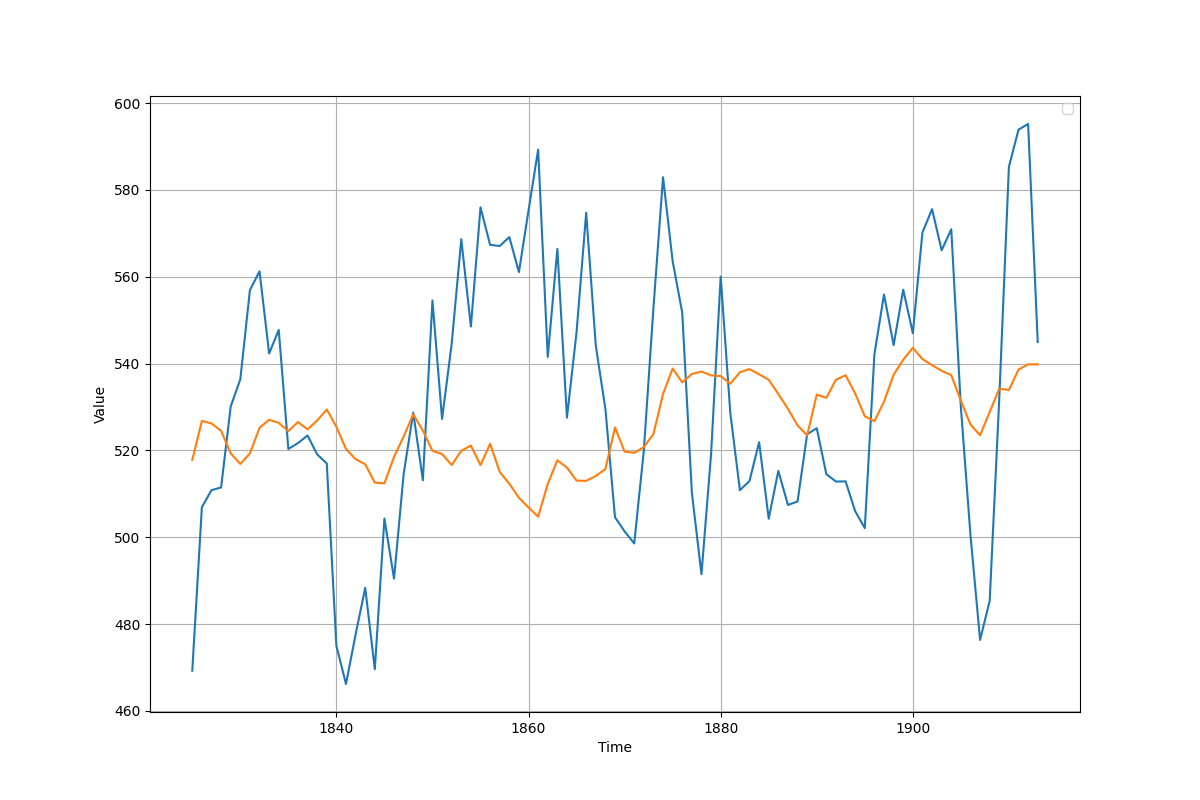

In [35]:
data_handler.plot_series(
    time=time_data[-split:-split+90],
    series=(series[-split:-split+90], forecast["Values"]),
    labels=labels
)


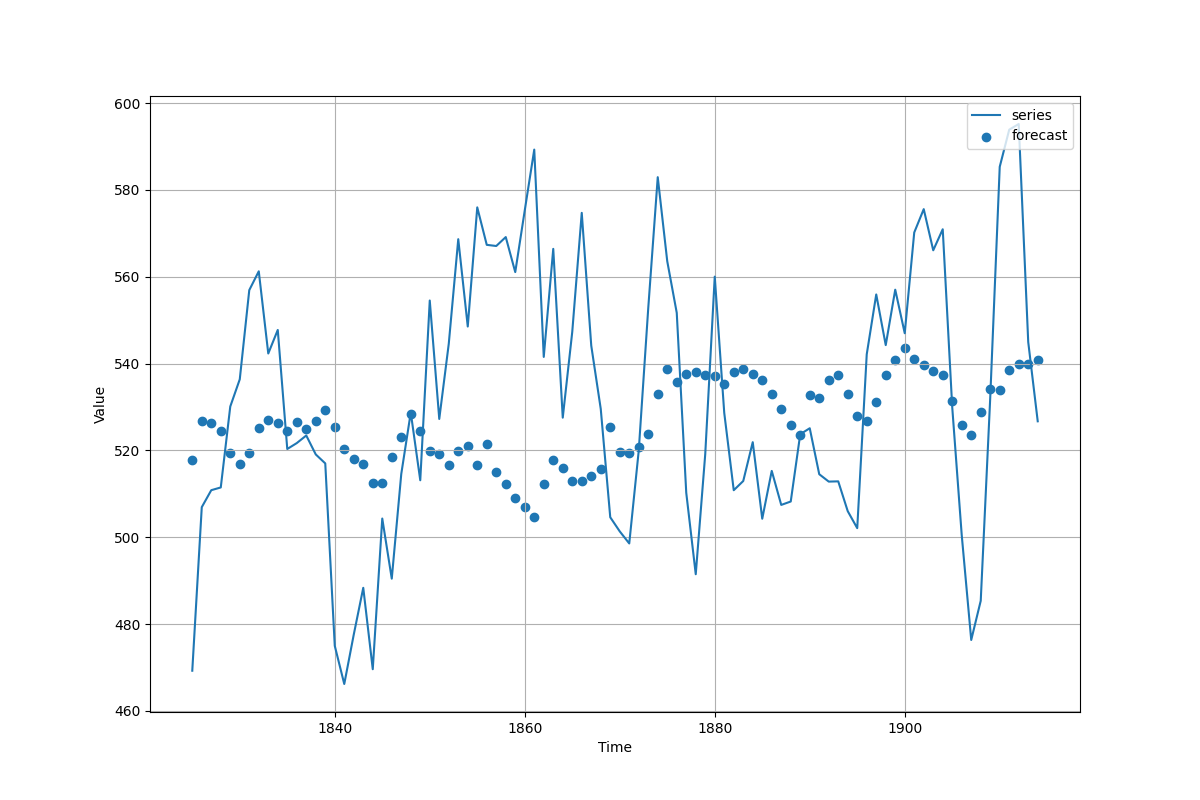

In [36]:
data_handler.plot_all(
    series_lines = [(time_data[-split:-split+90], series[-split:-split+90]),],
    series_points = [(time_data[-split:-split+90], forecast["Values"]),],
    labels_lines = ["series",],
    labels_points = ["forecast"],
    xy_label = ["Time", "Value"],
)